In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tracemalloc
from timeit import default_timer as timer

# ML algorithms - Full evaluation

In [ ]:
ml_k_results = []
ml_acc_results = []
ml_time_results = []
ml_ram_results = []

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer

In [ ]:
def cval_score(model, xtrain, ytrain, k_folds=5):
    
    # Splits the training set into the train and development sets for cross-validation
    kf = KFold(k_folds, shuffle = False, random_state = None).get_n_splits(xtrain.values)
    m = {
        'cohen_kappa_score': make_scorer(cohen_kappa_score),
        'balanced_accuracy': make_scorer(balanced_accuracy_score)
    }
    
    tracemalloc.start()
    # Calulates the cross validation score based on the selected metric
    score = cross_validate(model, xtrain.values, ytrain, scoring=m, cv = kf)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()    
    
    # Returns the cross-validation score
    return score,current,peak

In [ ]:
df = pd.read_csv('dataset/Elec.csv')

df_features = df.drop('class', axis=1)
df_target = df['class']

## KNN

In [ ]:
knn = KNeighborsClassifier()
grid = {'n_neighbors': [3, 5, 7, 10]}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=knn, param_grid=grid, cv=kf)
clf.fit(df_features, df_target)
print(clf.best_params_, clf.best_score_)
score,current,peak = cval_score(clf.best_estimator_, df_features, df_target)

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(score['test_balanced_accuracy'].mean(), score['test_balanced_accuracy'].std()*2))
print("K statistic: {:0.2f} (+/- {:0.2f})".format(score['test_cohen_kappa_score'].mean(), score['test_cohen_kappa_score'].std()*2))
print("Train Time: {:0.2f} (+/- {:0.2f})".format(score['fit_time'].mean(), score['fit_time'].std()*2))
print(f"Current memory usage is {current / 1024**2 / 5} MB; Peak was {peak / 1024**2 / 5} MB")


In [ ]:
ml_k_results.append(score['test_cohen_kappa_score'].mean())
ml_acc_results.append(score['test_balanced_accuracy'].mean())
ml_time_results.append(score['fit_time'].mean())
ml_ram_results.append(peak / 1024**2 / 5)

## Naïve Bayes

In [ ]:
nv = GaussianNB()

#kf = KFold(5, shuffle = False, random_state = None)
#clf = GridSearchCV(estimator=nv, cv=kf)
#clf.fit(df_features, df_target)
#print(clf.best_params_, clf.best_score_)
score,current,peak = cval_score(nv, df_features, df_target)

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(score['test_balanced_accuracy'].mean(), score['test_balanced_accuracy'].std()*2))
print("K statistic: {:0.2f} (+/- {:0.2f})".format(score['test_cohen_kappa_score'].mean(), score['test_cohen_kappa_score'].std()*2))
print("Train Time: {:0.2f} (+/- {:0.2f})".format(score['fit_time'].mean(), score['fit_time'].std()*2))
print(f"Current memory usage is {current / 1024**2 / 5} MB; Peak was {peak / 1024**2 / 5} MB")


In [ ]:
ml_k_results.append(score['test_cohen_kappa_score'].mean())
ml_acc_results.append(score['test_balanced_accuracy'].mean())
ml_time_results.append(score['fit_time'].mean())
ml_ram_results.append(peak / 1024**2 / 5)

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
grid = {
    'max_depth': [2, 5, 10],
    'max_features': ['auto','log2',None]
}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=dt, param_grid=grid, cv=kf)
clf.fit(df_features, df_target)
print(clf.best_params_, clf.best_score_)
score,current,peak = cval_score(clf.best_estimator_, df_features, df_target)

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(score['test_balanced_accuracy'].mean(), score['test_balanced_accuracy'].std()*2))
print("K statistic: {:0.2f} (+/- {:0.2f})".format(score['test_cohen_kappa_score'].mean(), score['test_cohen_kappa_score'].std()*2))
print("Train Time: {:0.2f} (+/- {:0.2f})".format(score['fit_time'].mean(), score['fit_time'].std()*2))
print(f"Current memory usage is {current / 1024**2 / 5} MB; Peak was {peak / 1024**2 / 5} MB")


In [ ]:
ml_k_results.append(score['test_cohen_kappa_score'].mean())
ml_acc_results.append(score['test_balanced_accuracy'].mean())
ml_time_results.append(score['fit_time'].mean())
ml_ram_results.append(peak / 1024**2 / 5)

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid = {
    'max_depth': [2, 5, 10, None],
    'n_estimators': [50,100,150,200],
    'max_features': ['auto','log2',None]
}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=rf, param_grid=grid, cv=kf)
clf.fit(df_features, df_target)
print(clf.best_params_, clf.best_score_)
score,current,peak = cval_score(clf.best_estimator_, df_features, df_target)

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(score['test_balanced_accuracy'].mean(), score['test_balanced_accuracy'].std()*2))
print("K statistic: {:0.2f} (+/- {:0.2f})".format(score['test_cohen_kappa_score'].mean(), score['test_cohen_kappa_score'].std()*2))
print("Train Time: {:0.2f} (+/- {:0.2f})".format(score['fit_time'].mean(), score['fit_time'].std()*2))
print(f"Current memory usage is {current / 1024**2 / 5} MB; Peak was {peak / 1024**2 / 5} MB")


In [ ]:
ml_k_results.append(score['test_cohen_kappa_score'].mean())
ml_acc_results.append(score['test_balanced_accuracy'].mean())
ml_time_results.append(score['fit_time'].mean())
ml_ram_results.append(peak / 1024**2 / 5)

## Bagging of tree

In [ ]:
bc = BaggingClassifier(random_state=42, base_estimator=DecisionTreeClassifier(random_state=42))
grid = {    
    'n_estimators': [10,15,20]
}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=bc, param_grid=grid, cv=kf)
clf.fit(df_features, df_target)
print(clf.best_params_, clf.best_score_)
score,current,peak = cval_score(clf.best_estimator_, df_features, df_target)

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(score['test_balanced_accuracy'].mean(), score['test_balanced_accuracy'].std()*2))
print("K statistic: {:0.2f} (+/- {:0.2f})".format(score['test_cohen_kappa_score'].mean(), score['test_cohen_kappa_score'].std()*2))
print("Train Time: {:0.2f} (+/- {:0.2f})".format(score['fit_time'].mean(), score['fit_time'].std()*2))
print(f"Current memory usage is {current / 1024**2 / 5} MB; Peak was {peak / 1024**2 / 5} MB")


In [ ]:
ml_k_results.append(score['test_cohen_kappa_score'].mean())
ml_acc_results.append(score['test_balanced_accuracy'].mean())
ml_time_results.append(score['fit_time'].mean())
ml_ram_results.append(peak / 1024**2 / 5)

## AdaBoost of tree

In [ ]:
abc = AdaBoostClassifier(random_state=42, base_estimator=DecisionTreeClassifier(random_state=42))
grid = {    
    'n_estimators': [50,70,80]
}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=bc, param_grid=grid, cv=kf)
clf.fit(df_features, df_target)
print(clf.best_params_, clf.best_score_)
score,current,peak = cval_score(clf.best_estimator_, df_features, df_target)

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(score['test_balanced_accuracy'].mean(), score['test_balanced_accuracy'].std()*2))
print("K statistic: {:0.2f} (+/- {:0.2f})".format(score['test_cohen_kappa_score'].mean(), score['test_cohen_kappa_score'].std()*2))
print("Train Time: {:0.2f} (+/- {:0.2f})".format(score['fit_time'].mean(), score['fit_time'].std()*2))
print(f"Current memory usage is {current / 1024**2 / 5} MB; Peak was {peak / 1024**2 / 5} MB")


In [ ]:
ml_k_results.append(score['test_cohen_kappa_score'].mean())
ml_acc_results.append(score['test_balanced_accuracy'].mean())
ml_time_results.append(score['fit_time'].mean())
ml_ram_results.append(peak / 1024**2 / 5)

## GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
grid = {    
    'n_estimators': [100,150,200],
    'max_depth': [3,5,10],
    'max_features': ['auto','log2',None]
}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=gbc, param_grid=grid, cv=kf)
clf.fit(df_features, df_target)
print(clf.best_params_, clf.best_score_)
score,current,peak = cval_score(clf.best_estimator_, df_features, df_target)

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(score['test_balanced_accuracy'].mean(), score['test_balanced_accuracy'].std()*2))
print("K statistic: {:0.2f} (+/- {:0.2f})".format(score['test_cohen_kappa_score'].mean(), score['test_cohen_kappa_score'].std()*2))
print("Train Time: {:0.2f} (+/- {:0.2f})".format(score['fit_time'].mean(), score['fit_time'].std()*2))
print(f"Current memory usage is {current / 1024**2 / 5} MB; Peak was {peak / 1024**2 / 5} MB")


In [ ]:
ml_k_results.append(score['test_cohen_kappa_score'].mean())
ml_acc_results.append(score['test_balanced_accuracy'].mean())
ml_time_results.append(score['fit_time'].mean())
ml_ram_results.append(peak / 1024**2 / 5)

## Plot ML

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(2, 2, figsize=(20,25))
axs[0,0].bar(['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'], ml_k_results)
axs[0,0].set_title('K statistic', fontsize="large")
axs[0,0].set_xticklabels(labels=['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'],rotation=45)
axs[0,1].bar(['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'], ml_acc_results)
axs[0,1].set_title('Balanced Accuracy', fontsize="large")
axs[0,1].set_xticklabels(labels=['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'],rotation=45)
axs[1,0].bar(['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'], ml_time_results)
axs[1,0].set_title('Time (s)', fontsize="large")
axs[1,0].set_xticklabels(labels=['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'],rotation=45)
axs[1,1].bar(['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'], np.array(ml_ram_results))
axs[1,1].set_title('RAM (MB)', fontsize="large")
axs[1,1].set_xticklabels(labels=['KNN','NB','DT','RF','Bagging','AdaBoost','GradientBoosting'],rotation=45)

# ML algorithms - Frammented evaluation - Sliding window

In [ ]:
from river.drift import ADWIN

In [ ]:
ml_frammented_k_results = {}
ml_frammented_acc_results = {}
ml_frammented_time_results = {}
ml_frammented_ram_results = {}

In [ ]:
df = pd.read_csv('dataset/Elec.csv')

In [ ]:
adwin = ADWIN(delta=0.02)
drifts = []
drift_column = 'class'
win_size = 2

# detect concept drifts
for i, val in enumerate(df[drift_column]):
    adwin.update(val)
    if adwin.change_detected:
        drifts.append(i)
        adwin.reset()

print(f'detected {len(drifts)} concept drifts on attribute \'{drift_column}\'')
if len(drifts) > 1:
    print(f'first drift @ {drifts[0]}, last drift @ {drifts[-1]}')

# extends detect drifts bounds with initial and final indices
segments = [0] + drifts + [len(df)-1]

## KNN

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

cv = 2

knn = KNeighborsClassifier()
grid = {'n_neighbors': [3, 5, 7, 10]}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=knn, param_grid=grid, cv=kf)

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
            
    clf.fit(df_features, df_target)
    score,current,peak = cval_score(clf.best_estimator_, df_features, df_target, k_folds=cv)
    
    k_results.append(score['test_cohen_kappa_score'].mean())
    acc_results.append(score['test_balanced_accuracy'].mean())
    time_results.append(score['fit_time'].mean())
    ram_results.append(peak / 1024**2 / cv)
    
ml_frammented_k_results['KNN'] = k_results
ml_frammented_acc_results['KNN'] = acc_results
ml_frammented_time_results['KNN'] = time_results
ml_frammented_ram_results['KNN'] = ram_results

## Naïve Bayes

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

cv = 2

nv = GaussianNB()

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
            
    score,current,peak = cval_score(nv, df_features, df_target, k_folds=cv)
    
    k_results.append(score['test_cohen_kappa_score'].mean())
    acc_results.append(score['test_balanced_accuracy'].mean())
    time_results.append(score['fit_time'].mean())
    ram_results.append(peak / 1024**2 / cv)
    
ml_frammented_k_results['NB'] = k_results
ml_frammented_acc_results['NB'] = acc_results
ml_frammented_time_results['NB'] = time_results
ml_frammented_ram_results['NB'] = ram_results

## Decision Tree

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

cv = 2

dt = DecisionTreeClassifier(random_state=42)
grid = {
    'max_depth': [2, 5, 10],
    'max_features': ['auto','log2',None]
}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=dt, param_grid=grid, cv=kf)

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
            
    clf.fit(df_features, df_target)
    score,current,peak = cval_score(clf.best_estimator_, df_features, df_target, k_folds=cv)
    
    k_results.append(score['test_cohen_kappa_score'].mean())
    acc_results.append(score['test_balanced_accuracy'].mean())
    time_results.append(score['fit_time'].mean())
    ram_results.append(peak / 1024**2 / cv)
    
ml_frammented_k_results['DT'] = k_results
ml_frammented_acc_results['DT'] = acc_results
ml_frammented_time_results['DT'] = time_results
ml_frammented_ram_results['DT'] = ram_results

## Random Forest

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

cv = 2

rf = RandomForestClassifier(random_state=42)
grid = {
    'max_depth': [2, 5, 10, None],
    'n_estimators': [50,100,150,200],
    'max_features': ['auto','log2',None]
}
kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=rf, param_grid=grid, cv=kf)

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
            
    clf.fit(df_features, df_target)
    score,current,peak = cval_score(clf.best_estimator_, df_features, df_target, k_folds=cv)
    
    k_results.append(score['test_cohen_kappa_score'].mean())
    acc_results.append(score['test_balanced_accuracy'].mean())
    time_results.append(score['fit_time'].mean())
    ram_results.append(peak / 1024**2 / cv)
    
ml_frammented_k_results['RF'] = k_results
ml_frammented_acc_results['RF'] = acc_results
ml_frammented_time_results['RF'] = time_results
ml_frammented_ram_results['RF'] = ram_results

## Bagging of tree

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

cv = 2

bc = BaggingClassifier(random_state=42, base_estimator=DecisionTreeClassifier(random_state=42))
grid = {    
    'n_estimators': [10,15,20]
}
kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=bc, param_grid=grid, cv=kf)

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
            
    clf.fit(df_features, df_target)
    score,current,peak = cval_score(clf.best_estimator_, df_features, df_target, k_folds=cv)
    
    k_results.append(score['test_cohen_kappa_score'].mean())
    acc_results.append(score['test_balanced_accuracy'].mean())
    time_results.append(score['fit_time'].mean())
    ram_results.append(peak / 1024**2 / cv)
    
ml_frammented_k_results['Bagging'] = k_results
ml_frammented_acc_results['Bagging'] = acc_results
ml_frammented_time_results['Bagging'] = time_results
ml_frammented_ram_results['Bagging'] = ram_results

## AdaBoost of tree

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

cv = 2

abc = AdaBoostClassifier(random_state=42, base_estimator=DecisionTreeClassifier(random_state=42))
grid = {    
    'n_estimators': [50,70,80]
}
kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=abc, param_grid=grid, cv=kf)

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
            
    clf.fit(df_features, df_target)
    score,current,peak = cval_score(clf.best_estimator_, df_features, df_target, k_folds=cv)
    
    k_results.append(score['test_cohen_kappa_score'].mean())
    acc_results.append(score['test_balanced_accuracy'].mean())
    time_results.append(score['fit_time'].mean())
    ram_results.append(peak / 1024**2 / cv)
    
ml_frammented_k_results['AdaBoost'] = k_results
ml_frammented_acc_results['AdaBoost'] = acc_results
ml_frammented_time_results['AdaBoost'] = time_results
ml_frammented_ram_results['AdaBoost'] = ram_results

## GradientBoostingClassifier

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

cv = 2

gbc = GradientBoostingClassifier(random_state=42)
grid = {    
    'n_estimators': [100,150,200],
    'max_depth': [3,5,10],
    'max_features': ['auto','log2',None]
}

kf = KFold(5, shuffle = False, random_state = None)
clf = GridSearchCV(estimator=gbc, param_grid=grid, cv=kf)

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
            
    clf.fit(df_features, df_target)
    score,current,peak = cval_score(clf.best_estimator_, df_features, df_target, k_folds=cv)
    
    k_results.append(score['test_cohen_kappa_score'].mean())
    acc_results.append(score['test_balanced_accuracy'].mean())
    time_results.append(score['fit_time'].mean())
    ram_results.append(peak / 1024**2 / cv)
    
ml_frammented_k_results['GradientBoosting'] = k_results
ml_frammented_acc_results['GradientBoosting'] = acc_results
ml_frammented_time_results['GradientBoosting'] = time_results
ml_frammented_ram_results['GradientBoosting'] = ram_results

## Plot ML - frammented -Sliding window

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(7, 4, figsize=(40,30))
fig.tight_layout()
k = list(ml_frammented_k_results.keys())
x_axis = range(len(ml_frammented_k_results[k[0]]))

for r in range(7):
    axs[r,0].plot(x_axis, ml_frammented_k_results[k[r]],label=k[r])
    axs[r,0].set_title(k[r] + ' - K statistics', fontsize="large")
    axs[r,1].plot(x_axis, ml_frammented_acc_results[k[r]],label=k[r])
    axs[r,1].set_title(k[r] + ' - Balanced Accuracy', fontsize="large")
    axs[r,2].plot(x_axis, ml_frammented_time_results[k[r]],label=k[r])
    axs[r,2].set_title(k[r] + ' - Time (s)', fontsize="large")
    axs[r,3].plot(x_axis, ml_frammented_ram_results[k[r]],label=k[r])
    axs[r,3].set_title(k[r] + ' - RAM (MB)', fontsize="large")

# ML algorithms - Frammented evaluation - Landmark window

In [ ]:
from river.drift import ADWIN

In [ ]:
ml_frammented_landmark_k_results = {}
ml_frammented_landmark_acc_results = {}
ml_frammented_landmark_time_results = {}
ml_frammented_landmark_ram_results = {}

In [ ]:
df = pd.read_csv('dataset/Elec.csv')
n_test = 48

In [ ]:
adwin = ADWIN(delta=0.02)
drifts = []
drift_column = 'class'
win_size = 2

# detect concept drifts
for i, val in enumerate(df[drift_column]):
    adwin.update(val)
    if adwin.change_detected:
        drifts.append(i)
        adwin.reset()

print(f'detected {len(drifts)} concept drifts on attribute \'{drift_column}\'')
if len(drifts) > 1:
    print(f'first drift @ {drifts[0]}, last drift @ {drifts[-1]}')

# extends detect drifts bounds with initial and final indices
segments = [0] + drifts + [len(df)-1]

## KNN

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []


model = KNeighborsClassifier()

for seg in range(win_size-1,len(segments)):
    # compute window indices
    start = segments[0]
    end = segments[seg]

    # extract window from the dataframe
    window = df[start:end]
    df_features_train = window.drop('class', axis=1)[:-n_test]
    df_target_train = window['class'][:-n_test]
    df_features_test = window.drop('class', axis=1).tail(n_test)
    df_target_test = window[['class']].tail(n_test)
    
    tracemalloc.start()
    t1 = timer()
    model.fit(df_features_train, df_target_train)
    t2 = timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()   
    df_target_test['predicted'] = model.predict(df_features_test)    
        
    k_results.append(cohen_kappa_score(df_target_test['class'],df_target_test['predicted']))
    acc_results.append(balanced_accuracy_score(df_target_test['class'],df_target_test['predicted']))
    time_results.append(t2-t1)
    ram_results.append(peak / 1024**2)
    
ml_frammented_landmark_k_results['KNN'] = k_results
ml_frammented_landmark_acc_results['KNN'] = acc_results
ml_frammented_landmark_time_results['KNN'] = time_results
ml_frammented_landmark_ram_results['KNN'] = ram_results

## Naïve Bayes

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = GaussianNB()

for seg in range(win_size-1,len(segments)):
    # compute window indices
    start = segments[0]
    end = segments[seg]

    window = df[start:end]
    df_features_train = window.drop('class', axis=1)[:-n_test]
    df_target_train = window['class'][:-n_test]
    df_features_test = window.drop('class', axis=1).tail(n_test)
    df_target_test = window[['class']].tail(n_test)
    
    tracemalloc.start()
    t1 = timer()
    model.fit(df_features_train, df_target_train)
    t2 = timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()   
    df_target_test['predicted'] = model.predict(df_features_test)    
        
    k_results.append(cohen_kappa_score(df_target_test['class'],df_target_test['predicted']))
    acc_results.append(balanced_accuracy_score(df_target_test['class'],df_target_test['predicted']))
    time_results.append(t2-t1)
    ram_results.append(peak / 1024**2)
    
ml_frammented_landmark_k_results['NB'] = k_results
ml_frammented_landmark_acc_results['NB'] = acc_results
ml_frammented_landmark_time_results['NB'] = time_results
ml_frammented_landmark_ram_results['NB'] = ram_results

## Decision Tree

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []



model = DecisionTreeClassifier(random_state=42)


for seg in range(win_size-1,len(segments)):
    # compute window indices
    start = segments[0]
    end = segments[seg]

    window = df[start:end]
    df_features_train = window.drop('class', axis=1)[:-n_test]
    df_target_train = window['class'][:-n_test]
    df_features_test = window.drop('class', axis=1).tail(n_test)
    df_target_test = window[['class']].tail(n_test)
    
    tracemalloc.start()
    t1 = timer()
    model.fit(df_features_train, df_target_train)
    t2 = timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()   
    df_target_test['predicted'] = model.predict(df_features_test)    
        
    k_results.append(cohen_kappa_score(df_target_test['class'],df_target_test['predicted']))
    acc_results.append(balanced_accuracy_score(df_target_test['class'],df_target_test['predicted']))
    time_results.append(t2-t1)
    ram_results.append(peak / 1024**2)
    
ml_frammented_landmark_k_results['DT'] = k_results
ml_frammented_landmark_acc_results['DT'] = acc_results
ml_frammented_landmark_time_results['DT'] = time_results
ml_frammented_landmark_ram_results['DT'] = ram_results

## Random Forest

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = RandomForestClassifier(random_state=42)

for seg in range(win_size-1,len(segments)):
    # compute window indices
    start = segments[0]
    end = segments[seg]

    window = df[start:end]
    df_features_train = window.drop('class', axis=1)[:-n_test]
    df_target_train = window['class'][:-n_test]
    df_features_test = window.drop('class', axis=1).tail(n_test)
    df_target_test = window[['class']].tail(n_test)
    
    tracemalloc.start()
    t1 = timer()
    model.fit(df_features_train, df_target_train)
    t2 = timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()   
    df_target_test['predicted'] = model.predict(df_features_test)    
        
    k_results.append(cohen_kappa_score(df_target_test['class'],df_target_test['predicted']))
    acc_results.append(balanced_accuracy_score(df_target_test['class'],df_target_test['predicted']))
    time_results.append(t2-t1)
    ram_results.append(peak / 1024**2)
    
ml_frammented_landmark_k_results['RF'] = k_results
ml_frammented_landmark_acc_results['RF'] = acc_results
ml_frammented_landmark_time_results['RF'] = time_results
ml_frammented_landmark_ram_results['RF'] = ram_results

## Bagging of tree

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = BaggingClassifier(random_state=42, base_estimator=DecisionTreeClassifier(random_state=42))

for seg in range(win_size-1,len(segments)):
    # compute window indices
    start = segments[0]
    end = segments[seg]

    window = df[start:end]
    df_features_train = window.drop('class', axis=1)[:-n_test]
    df_target_train = window['class'][:-n_test]
    df_features_test = window.drop('class', axis=1).tail(n_test)
    df_target_test = window[['class']].tail(n_test)
    
    tracemalloc.start()
    t1 = timer()
    model.fit(df_features_train, df_target_train)
    t2 = timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()   
    df_target_test['predicted'] = model.predict(df_features_test)    
        
    k_results.append(cohen_kappa_score(df_target_test['class'],df_target_test['predicted']))
    acc_results.append(balanced_accuracy_score(df_target_test['class'],df_target_test['predicted']))
    time_results.append(t2-t1)
    ram_results.append(peak / 1024**2)
    
ml_frammented_landmark_k_results['Bagging'] = k_results
ml_frammented_landmark_acc_results['Bagging'] = acc_results
ml_frammented_landmark_time_results['Bagging'] = time_results
ml_frammented_landmark_ram_results['Bagging'] = ram_results

## AdaBoost of tree

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = AdaBoostClassifier(random_state=42, base_estimator=DecisionTreeClassifier(random_state=42))

for seg in range(win_size-1,len(segments)):
    # compute window indices
    start = segments[0]
    end = segments[seg]

    window = df[start:end]
    df_features_train = window.drop('class', axis=1)[:-n_test]
    df_target_train = window['class'][:-n_test]
    df_features_test = window.drop('class', axis=1).tail(n_test)
    df_target_test = window[['class']].tail(n_test)
    
    tracemalloc.start()
    t1 = timer()
    model.fit(df_features_train, df_target_train)
    t2 = timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()   
    df_target_test['predicted'] = model.predict(df_features_test)    
        
    k_results.append(cohen_kappa_score(df_target_test['class'],df_target_test['predicted']))
    acc_results.append(balanced_accuracy_score(df_target_test['class'],df_target_test['predicted']))
    time_results.append(t2-t1)
    ram_results.append(peak / 1024**2)
    
ml_frammented_landmark_k_results['AdaBoost'] = k_results
ml_frammented_landmark_acc_results['AdaBoost'] = acc_results
ml_frammented_landmark_time_results['AdaBoost'] = time_results
ml_frammented_landmark_ram_results['AdaBoost'] = ram_results

## GradientBoostingClassifier

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = GradientBoostingClassifier(random_state=42)

for seg in range(win_size-1,len(segments)):
    # compute window indices
    start = segments[0]
    end = segments[seg]
    
    window = df[start:end]
    df_features_train = window.drop('class', axis=1)[:-n_test]
    df_target_train = window['class'][:-n_test]
    df_features_test = window.drop('class', axis=1).tail(n_test)
    df_target_test = window[['class']].tail(n_test)
    
    tracemalloc.start()
    t1 = timer()
    model.fit(df_features_train, df_target_train)
    t2 = timer()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()   
    df_target_test['predicted'] = model.predict(df_features_test)    
        
    k_results.append(cohen_kappa_score(df_target_test['class'],df_target_test['predicted']))
    acc_results.append(balanced_accuracy_score(df_target_test['class'],df_target_test['predicted']))
    time_results.append(t2-t1)
    ram_results.append(peak / 1024**2)
    
ml_frammented_landmark_k_results['GradientBoosting'] = k_results
ml_frammented_landmark_acc_results['GradientBoosting'] = acc_results
ml_frammented_landmark_time_results['GradientBoosting'] = time_results
ml_frammented_landmark_ram_results['GradientBoosting'] = ram_results

## Plot ML - frammented - Landmark window

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(7, 4, figsize=(40,30))
fig.tight_layout()
k = list(ml_frammented_landmark_k_results.keys())
x_axis = range(len(ml_frammented_landmark_k_results[k[0]]))

for r in range(7):
    axs[r,0].plot(x_axis, ml_frammented_landmark_k_results[k[r]],label=k[r])
    axs[r,0].set_title(k[r] + ' - K statistics', fontsize="large")
    axs[r,1].plot(x_axis, ml_frammented_landmark_acc_results[k[r]],label=k[r])
    axs[r,1].set_title(k[r] + ' - Balanced Accuracy', fontsize="large")
    axs[r,2].plot(x_axis, ml_frammented_landmark_time_results[k[r]],label=k[r])
    axs[r,2].set_title(k[r] + ' - Time (s)', fontsize="large")
    axs[r,3].plot(x_axis, ml_frammented_landmark_ram_results[k[r]],label=k[r])
    axs[r,3].set_title(k[r] + ' - MAX RAM (MB)', fontsize="large")

In [ ]:
for key in k:
    mean_time = np.mean(ml_frammented_landmark_time_results[key])
    std_time = np.std(ml_frammented_landmark_time_results[key])
    mean_ram = np.mean(ml_frammented_landmark_ram_results[key])
    std_ram = np.std(ml_frammented_landmark_ram_results[key])
    print('** ' + key + ' **')
    print('AVG Time: ' + str(mean_time) + 's std: ' + str(std_time))
    print('AVG RAM: ' + str(mean_ram) + 'MB std: ' + str(std_ram))

# SML

In [ ]:
from river import evaluate
from river import metrics
from river import naive_bayes
from river import neighbors
from river import ensemble
from river import tree
from river.stream import iter_pandas
from river.metrics import BalancedAccuracy,CohenKappa

from adaptive_xgboost import AdaptiveXGBoostClassifier
from hoeffding_tree_classifier import HoeffdingTreeClassifier
from hoeffding_adaptive_tree_classifier import HoeffdingAdaptiveTreeClassifier
from extremely_fast_decision_tree import ExtremelyFastDecisionTreeClassifier
from adaptive_random_forest import AdaptiveRandomForestClassifier
from k_fold_distributed_cross_validation import KFoldDistributedCrossValidation as KFDCV

In [ ]:
sml_k_results = []
sml_acc_results = []
sml_mem_results = []
sml_time_results = []

## Naive Bayes

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = naive_bayes.GaussianNB()
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## KNN

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = neighbors.KNNClassifier()
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## KNN ADWIN

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = neighbors.KNNADWINClassifier()
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## VFDT

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = HoeffdingTreeClassifier(nominal_attributes=['date','day','period'])
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## HAT

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = tree.HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period'],seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=1)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## HATT

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = ExtremelyFastDecisionTreeClassifier(nominal_attributes=['date','day','period'])
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## ARF

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period'],seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## Online Bagging

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = ensemble.BaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## Online ADWIN Bagging

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = ensemble.ADWINBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## Leveraging Bagging

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = ensemble.LeveragingBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## AdaBoost

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)
model = ensemble.AdaBoostClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## AdaptiveXGBoost_push

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)

# Adaptive XGBoost classifier parameters
n_estimators = 10       # Number of members in the ensemble
learning_rate = 0.3     # Learning rate or eta
max_depth = 6           # Max depth for each tree in the ensemble
max_window_size = 1000  # Max window size
min_window_size = 1     # set to activate the dynamic window strategy
detect_drift = True     # Enable/disable drift detection

model = AdaptiveXGBoostClassifier(update_strategy='push',
                                  n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  max_window_size=max_window_size,
                                  min_window_size=min_window_size,
                                  detect_drift=detect_drift)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## AdaptiveXGBoost_replace

In [ ]:
stream = iter_pandas(X=df_features, y=df_target)

# Adaptive XGBoost classifier parameters
n_estimators = 10       # Number of members in the ensemble
learning_rate = 0.3     # Learning rate or eta
max_depth = 6           # Max depth for each tree in the ensemble
max_window_size = 1000  # Max window size
min_window_size = 1     # set to activate the dynamic window strategy
detect_drift = True     # Enable/disable drift detection

model = AdaptiveXGBoostClassifier(update_strategy='replace',
                                  n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  max_window_size=max_window_size,
                                  min_window_size=min_window_size,
                                  detect_drift=detect_drift)
metrics = [BalancedAccuracy(),CohenKappa()]

kfcv = KFDCV(metrics,model,ensemble_size=5)
kfcv.evaluate(stream)
res = kfcv.get_measurements()

In [ ]:
print("Balanced Accuracy: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[0]]), np.std([x.get() for x in res[0]])*2))
print("Kappa: {:0.2f} (+/- {:0.2f})".format(np.mean([x.get() for x in res[1]]), np.std([x.get() for x in res[1]])*2))
print("Memory: {:0.2f} MB (+/- {:0.2f})".format(np.mean(res[2])/1024**2, np.std(res[2])/1024**2*2))
print("Time: {:0.2f} s (+/- {:0.2f})".format(np.mean(res[3]), np.std(res[3])*2))


In [ ]:
sml_acc_results.append(np.mean([x.get() for x in res[0]]))
sml_k_results.append(np.mean([x.get() for x in res[1]]))
sml_mem_results.append(np.mean(res[2])/1024**2)
sml_time_results.append(np.mean(res[3]))

## Plot SML

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(2, 2, figsize=(20,25))
x_axes = ['NB','KNN','KNN_ADWIN','VFDT','HAT','HATT','ARF','OB','OB_ADWIN','LB','AdaBoost','AXGBoost_push','AXGBoost_replace']
axs[0,0].bar(x_axes, sml_k_results)
axs[0,0].set_title('K statistic', fontsize="large")
axs[0,0].set_xticklabels(labels=x_axes,rotation=45)
axs[0,1].bar(x_axes, sml_acc_results)
axs[0,1].set_title('Balanced Accuracy', fontsize="large")
axs[0,1].set_xticklabels(labels=x_axes,rotation=45)
axs[1,0].bar(x_axes, sml_time_results)
axs[1,0].set_title('Time (s)', fontsize="large")
axs[1,0].set_xticklabels(labels=x_axes,rotation=45)
axs[1,1].bar(x_axes, np.array(sml_mem_results))
axs[1,1].set_title('RAM (MB)', fontsize="large")
axs[1,1].set_xticklabels(labels=x_axes,rotation=45)


# SML algorithms - Sliding evaluation

In [ ]:
sml_frammented_k_results = {}
sml_frammented_acc_results = {}
sml_frammented_time_results = {}
sml_frammented_ram_results = {}

In [ ]:
df = pd.read_csv('dataset/Elec.csv')

In [ ]:
from river.drift import ADWIN

adwin = ADWIN(delta=0.02)
drifts = []
drift_column = 'class'
win_size = 2

# detect concept drifts
for i, val in enumerate(df[drift_column]):
    adwin.update(val)
    if adwin.change_detected:
        drifts.append(i)
        adwin.reset()

print(f'detected {len(drifts)} concept drifts on attribute \'{drift_column}\'')
if len(drifts) > 1:
    print(f'first drift @ {drifts[0]}, last drift @ {drifts[-1]}')

# extends detect drifts bounds with initial and final indices
segments = [0] + drifts + [len(df)-1]

## Naïve Bayes

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = naive_bayes.GaussianNB()
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = naive_bayes.GaussianNB()
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['NB'] = k_results
sml_frammented_acc_results['NB'] = acc_results
sml_frammented_time_results['NB'] = time_results
sml_frammented_ram_results['NB'] = ram_results

## KNN

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = neighbors.KNNClassifier()
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model.reset()
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['KNN'] = k_results
sml_frammented_acc_results['KNN'] = acc_results
sml_frammented_time_results['KNN'] = time_results
sml_frammented_ram_results['KNN'] = ram_results

## KNN ADWIN

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = neighbors.KNNADWINClassifier()
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model.reset()
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['KNN_ADWIN'] = k_results
sml_frammented_acc_results['KNN_ADWIN'] = acc_results
sml_frammented_time_results['KNN_ADWIN'] = time_results
sml_frammented_ram_results['KNN_ADWIN'] = ram_results

## VFDT

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = HoeffdingTreeClassifier(nominal_attributes=['date','day','period'])
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = HoeffdingTreeClassifier(nominal_attributes=['date','day','period'])
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['VFDT'] = k_results
sml_frammented_acc_results['VFDT'] = acc_results
sml_frammented_time_results['VFDT'] = time_results
sml_frammented_ram_results['VFDT'] = ram_results

## HAT

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period'],seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period'],seed=42)
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['HAT'] = k_results
sml_frammented_acc_results['HAT'] = acc_results
sml_frammented_time_results['HAT'] = time_results
sml_frammented_ram_results['HAT'] = ram_results

## HATT

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ExtremelyFastDecisionTreeClassifier(nominal_attributes=['date','day','period'])
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = ExtremelyFastDecisionTreeClassifier(nominal_attributes=['date','day','period'])
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['HATT'] = k_results
sml_frammented_acc_results['HATT'] = acc_results
sml_frammented_time_results['HATT'] = time_results
sml_frammented_ram_results['HATT'] = ram_results

## ARF

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period'],seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period'],seed=42)
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['ARF'] = k_results
sml_frammented_acc_results['ARF'] = acc_results
sml_frammented_time_results['ARF'] = time_results
sml_frammented_ram_results['ARF'] = ram_results

## Online Bagging

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.BaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]


for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = ensemble.BaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['OB'] = k_results
sml_frammented_acc_results['OB'] = acc_results
sml_frammented_time_results['OB'] = time_results
sml_frammented_ram_results['OB'] = ram_results


## Online ADWIN Bagging

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.ADWINBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = ensemble.ADWINBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['OB_ADWIN'] = k_results
sml_frammented_acc_results['OB_ADWIN'] = acc_results
sml_frammented_time_results['OB_ADWIN'] = time_results
sml_frammented_ram_results['OB_ADWIN'] = ram_results


## Leveraging Bagging

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.LeveragingBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = ensemble.LeveragingBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['LB'] = k_results
sml_frammented_acc_results['LB'] = acc_results
sml_frammented_time_results['LB'] = time_results
sml_frammented_ram_results['LB'] = ram_results


## AdaBoost

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.AdaBoostClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model = ensemble.AdaBoostClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['AdaBoost'] = k_results
sml_frammented_acc_results['AdaBoost'] = acc_results
sml_frammented_time_results['AdaBoost'] = time_results
sml_frammented_ram_results['AdaBoost'] = ram_results


## AdaptiveXGBoost_push

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

# Adaptive XGBoost classifier parameters
n_estimators = 10       # Number of members in the ensemble
learning_rate = 0.3     # Learning rate or eta
max_depth = 6           # Max depth for each tree in the ensemble
max_window_size = 1000  # Max window size
min_window_size = 1     # set to activate the dynamic window strategy
detect_drift = True     # Enable/disable drift detection

model = AdaptiveXGBoostClassifier(update_strategy='push',
                                  n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  max_window_size=max_window_size,
                                  min_window_size=min_window_size,
                                  detect_drift=detect_drift)
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model.reset()
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['AXGBoost_push'] = k_results
sml_frammented_acc_results['AXGBoost_push'] = acc_results
sml_frammented_time_results['AXGBoost_push'] = time_results
sml_frammented_ram_results['AXGBoost_push'] = ram_results


## AdaptiveXGBoost_replace

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

# Adaptive XGBoost classifier parameters
n_estimators = 10       # Number of members in the ensemble
learning_rate = 0.3     # Learning rate or eta
max_depth = 6           # Max depth for each tree in the ensemble
max_window_size = 1000  # Max window size
min_window_size = 1     # set to activate the dynamic window strategy
detect_drift = True     # Enable/disable drift detection

model = AdaptiveXGBoostClassifier(update_strategy='replace',
                                  n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  max_window_size=max_window_size,
                                  min_window_size=min_window_size,
                                  detect_drift=detect_drift)
metrics = [BalancedAccuracy(),CohenKappa()]

for seg in range(len(segments)-win_size):
    # compute window indices
    start = segments[seg]
    end = segments[seg+win_size]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    model.reset()
    kfcv = KFDCV(metrics,model,ensemble_size=5)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
sml_frammented_k_results['AXGBoost_replace'] = k_results
sml_frammented_acc_results['AXGBoost_replace'] = acc_results
sml_frammented_time_results['AXGBoost_replace'] = time_results
sml_frammented_ram_results['AXGBoost_replace'] = ram_results


## Plot SML - sliding

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(13, 4, figsize=(40,30))
fig.tight_layout()
k = list(sml_frammented_k_results.keys())
x_axis = range(len(sml_frammented_k_results[k[0]]))

for r in range(13):
    axs[r,0].plot(x_axis, sml_frammented_k_results[k[r]],label=k[r])
    axs[r,0].set_title(k[r] + ' - K statistics', fontsize="large")
    axs[r,1].plot(x_axis, sml_frammented_acc_results[k[r]],label=k[r])
    axs[r,1].set_title(k[r] + ' - Balanced Accuracy', fontsize="large")
    axs[r,2].plot(x_axis, sml_frammented_time_results[k[r]],label=k[r])
    axs[r,2].set_title(k[r] + ' - Time (s)', fontsize="large")
    axs[r,3].plot(x_axis, sml_frammented_ram_results[k[r]],label=k[r])
    axs[r,3].set_title(k[r] + ' - RAM (MB)', fontsize="large")

# SML algorithms - landmark evaluation

In [ ]:
sml_landmark_k_results = {}
sml_landmark_acc_results = {}
sml_landmark_time_results = {}
sml_landmark_ram_results = {}

In [ ]:
df = pd.read_csv('dataset/Elec.csv')

In [ ]:
from river.drift import ADWIN

adwin = ADWIN(delta=0.02)
drifts = []
drift_column = 'class'
win_size = 2

# detect concept drifts
for i, val in enumerate(df[drift_column]):
    adwin.update(val)
    if adwin.change_detected:
        drifts.append(i)
        adwin.reset()

print(f'detected {len(drifts)} concept drifts on attribute \'{drift_column}\'')
if len(drifts) > 1:
    print(f'first drift @ {drifts[0]}, last drift @ {drifts[-1]}')

# extends detect drifts bounds with initial and final indices
segments = [0] + drifts + [len(df)-1]

## Naïve Bayes

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = naive_bayes.GaussianNB()
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['NB'] = k_results
sml_landmark_acc_results['NB'] = acc_results
sml_landmark_time_results['NB'] = time_results
sml_landmark_ram_results['NB'] = ram_results

## KNN

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = neighbors.KNNClassifier()
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]
    
    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['KNN'] = k_results
sml_landmark_acc_results['KNN'] = acc_results
sml_landmark_time_results['KNN'] = time_results
sml_landmark_ram_results['KNN'] = ram_results

## KNN ADWIN

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = neighbors.KNNADWINClassifier()
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['KNN_ADWIN'] = k_results
sml_landmark_acc_results['KNN_ADWIN'] = acc_results
sml_landmark_time_results['KNN_ADWIN'] = time_results
sml_landmark_ram_results['KNN_ADWIN'] = ram_results

## VFDT

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = HoeffdingTreeClassifier(nominal_attributes=['date','day','period'])
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['VFDT'] = k_results
sml_landmark_acc_results['VFDT'] = acc_results
sml_landmark_time_results['VFDT'] = time_results
sml_landmark_ram_results['VFDT'] = ram_results

## HAT

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period'],seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['HAT'] = k_results
sml_landmark_acc_results['HAT'] = acc_results
sml_landmark_time_results['HAT'] = time_results
sml_landmark_ram_results['HAT'] = ram_results

## HATT

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ExtremelyFastDecisionTreeClassifier(nominal_attributes=['date','day','period'])
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)    
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['HATT'] = k_results
sml_landmark_acc_results['HATT'] = acc_results
sml_landmark_time_results['HATT'] = time_results
sml_landmark_ram_results['HATT'] = ram_results

## ARF

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period'],seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['ARF'] = k_results
sml_landmark_acc_results['ARF'] = acc_results
sml_landmark_time_results['ARF'] = time_results
sml_landmark_ram_results['ARF'] = ram_results

## Online Bagging

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.BaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]
    
    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['OB'] = k_results
sml_landmark_acc_results['OB'] = acc_results
sml_landmark_time_results['OB'] = time_results
sml_landmark_ram_results['OB'] = ram_results


## Online ADWIN Bagging

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.ADWINBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)       
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['OB_ADWIN'] = k_results
sml_landmark_acc_results['OB_ADWIN'] = acc_results
sml_landmark_time_results['OB_ADWIN'] = time_results
sml_landmark_ram_results['OB_ADWIN'] = ram_results


## Leveraging Bagging

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.LeveragingBaggingClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['LB'] = k_results
sml_landmark_acc_results['LB'] = acc_results
sml_landmark_time_results['LB'] = time_results
sml_landmark_ram_results['LB'] = ram_results


## AdaBoost

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

model = ensemble.AdaBoostClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period']),n_models=10,seed=42)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['AdaBoost'] = k_results
sml_landmark_acc_results['AdaBoost'] = acc_results
sml_landmark_time_results['AdaBoost'] = time_results
sml_landmark_ram_results['AdaBoost'] = ram_results


## AdaptiveXGBoost_push

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

# Adaptive XGBoost classifier parameters
n_estimators = 10       # Number of members in the ensemble
learning_rate = 0.3     # Learning rate or eta
max_depth = 6           # Max depth for each tree in the ensemble
max_window_size = 1000  # Max window size
min_window_size = 1     # set to activate the dynamic window strategy
detect_drift = True     # Enable/disable drift detection

model = AdaptiveXGBoostClassifier(update_strategy='push',
                                  n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  max_window_size=max_window_size,
                                  min_window_size=min_window_size,
                                  detect_drift=detect_drift)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['AXGBoost_push'] = k_results
sml_landmark_acc_results['AXGBoost_push'] = acc_results
sml_landmark_time_results['AXGBoost_push'] = time_results
sml_landmark_ram_results['AXGBoost_push'] = ram_results


## AdaptiveXGBoost_replace

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

# Adaptive XGBoost classifier parameters
n_estimators = 10       # Number of members in the ensemble
learning_rate = 0.3     # Learning rate or eta
max_depth = 6           # Max depth for each tree in the ensemble
max_window_size = 1000  # Max window size
min_window_size = 1     # set to activate the dynamic window strategy
detect_drift = True     # Enable/disable drift detection

model = AdaptiveXGBoostClassifier(update_strategy='replace',
                                  n_estimators=n_estimators,
                                  learning_rate=learning_rate,
                                  max_depth=max_depth,
                                  max_window_size=max_window_size,
                                  min_window_size=min_window_size,
                                  detect_drift=detect_drift)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['AXGBoost_replace'] = k_results
sml_landmark_acc_results['AXGBoost_replace'] = acc_results
sml_landmark_time_results['AXGBoost_replace'] = time_results
sml_landmark_ram_results['AXGBoost_replace'] = ram_results


## No change

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

from river import dummy

model = dummy.NoChangeClassifier()
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)        
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['NC'] = k_results
sml_landmark_acc_results['NC'] = acc_results
sml_landmark_time_results['NC'] = time_results
sml_landmark_ram_results['NC'] = ram_results

## SWT

In [ ]:
from temporally_augmented_classifier import TemporallyAugmentedClassifier

models = [
    TemporallyAugmentedClassifier(model=neighbors.KNNADWINClassifier(),n_old_labels=1),
    TemporallyAugmentedClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period','label_0']),n_old_labels=1),
    TemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','label_0'],seed=42),n_old_labels=1),
    TemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','label_0'],seed=42),n_old_labels=1),
    TemporallyAugmentedClassifier(model=neighbors.KNNADWINClassifier(),n_old_labels=2),
    TemporallyAugmentedClassifier(model=HoeffdingTreeClassifier(nominal_attributes=['date','day','period','label_0','label_1']),n_old_labels=2),
    TemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','label_0','label_1'],seed=42),n_old_labels=2),
    TemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','label_0','label_1'],seed=42),n_old_labels=2)
]
name_models = [
    'SWT10_KNN_ADWIN',
    'SWT10_VFDT',
    'SWT10_HAT',
    'SWT10_ARF',
    'SWT20_KNN_ADWIN',
    'SWT20_VFDT',
    'SWT20_HAT',
    'SWT20_ARF'
]


for m in range(len(models)):
    
    print(name_models[m])
    
    k_results = []
    acc_results = []
    time_results = []
    ram_results = []

    model = models[m]
    metrics = [BalancedAccuracy(),CohenKappa()]
    kfcv = KFDCV(metrics,model,ensemble_size=5)

    for seg in range(len(segments)-1):
        # compute window indices
        start = segments[seg]
        end = segments[seg+1]

        # extract window from the dataframe
        window = df[start:end]
        df_features = window.drop('class', axis=1)
        df_target = window['class']
        stream = iter_pandas(X=df_features, y=df_target)    
        
        kfcv.evaluate(stream)
        res = kfcv.get_measurements()

        acc_results.append(np.mean([x.get() for x in res[0]]))
        k_results.append(np.mean([x.get() for x in res[1]]))
        ram_results.append(np.mean(res[2])/1024**2)
        time_results.append(np.mean(res[3]))
        
        kfcv.reset_metrics(metrics)

    sml_landmark_k_results[name_models[m]] = k_results
    sml_landmark_acc_results[name_models[m]] = acc_results
    sml_landmark_time_results[name_models[m]] = time_results
    sml_landmark_ram_results[name_models[m]] = ram_results

## SWT Predicted label

In [ ]:
from predicted_temporally_augmented_classifier import PredictedTemporallyAugmentedClassifier

models = [
    PredictedTemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','predicted_label_0']),n_old_labels=-1,n_old_predicted_labels=1),
    PredictedTemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','label_0','predicted_label_0']),n_old_labels=1,n_old_predicted_labels=1),
    PredictedTemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','label_0','label_1','predicted_label_0']),n_old_labels=2,n_old_predicted_labels=1),
    PredictedTemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','predicted_label_0','predicted_label_1'],seed=42),n_old_labels=-1,n_old_predicted_labels=2),
    PredictedTemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','label_0','predicted_label_0','predicted_label_1'],seed=42),n_old_labels=1,n_old_predicted_labels=2),
    PredictedTemporallyAugmentedClassifier(model=HoeffdingAdaptiveTreeClassifier(nominal_attributes=['date','day','period','label_0','label_1','predicted_label_0','predicted_label_1'],seed=42),n_old_labels=2,n_old_predicted_labels=2),
    PredictedTemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','predicted_label_0'],seed=42),n_old_labels=-1,n_old_predicted_labels=1),
    PredictedTemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','label_0','predicted_label_0'],seed=42),n_old_labels=1,n_old_predicted_labels=1),
    PredictedTemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','label_0','label_1','predicted_label_0'],seed=42),n_old_labels=2,n_old_predicted_labels=1),
    PredictedTemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','predicted_label_0','predicted_label_1'],seed=42),n_old_labels=-1,n_old_predicted_labels=2),    
    PredictedTemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','label_0','predicted_label_0','predicted_label_1'],seed=42),n_old_labels=1,n_old_predicted_labels=2),
    PredictedTemporallyAugmentedClassifier(model=AdaptiveRandomForestClassifier(n_models=10,nominal_attributes=['date','day','period','label_0','label_1','predicted_label_0','predicted_label_1'],seed=42),n_old_labels=2,n_old_predicted_labels=2)   
]
name_models = [
    'SWT01_HAT',
    'SWT11_HAT',
    'SWT21_HAT',
    'SWT02_HAT',
    'SWT12_HAT',
    'SWT22_HAT',
    'SWT01_ARF',
    'SWT11_ARF',
    'SWT21_ARF',
    'SWT02_ARF',
    'SWT12_ARF',
    'SWT22_ARF',
]


for m in range(len(models)):
    
    print(name_models[m])
    
    k_results = []
    acc_results = []
    time_results = []
    ram_results = []

    model = models[m]
    metrics = [BalancedAccuracy(),CohenKappa()]
    kfcv = KFDCV(metrics,model,ensemble_size=5)

    for seg in range(len(segments)-1):
        # compute window indices
        start = segments[seg]
        end = segments[seg+1]

        # extract window from the dataframe
        window = df[start:end]
        df_features = window.drop('class', axis=1)
        df_target = window['class']
        stream = iter_pandas(X=df_features, y=df_target)    
        
        kfcv.evaluate(stream)
        res = kfcv.get_measurements()

        acc_results.append(np.mean([x.get() for x in res[0]]))
        k_results.append(np.mean([x.get() for x in res[1]]))
        ram_results.append(np.mean(res[2])/1024**2)
        time_results.append(np.mean(res[3]))
        
        kfcv.reset_metrics(metrics)

    sml_landmark_k_results[name_models[m]] = k_results
    sml_landmark_acc_results[name_models[m]] = acc_results
    sml_landmark_time_results[name_models[m]] = time_results
    sml_landmark_ram_results[name_models[m]] = ram_results
    

## MajorityVote

In [ ]:
from majority_voting_classifier import MajorityVotingClassifier

k_results = []
acc_results = []
time_results = []
ram_results = []

model = MajorityVotingClassifier(n_old_labels=2)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_features = window.drop('class', axis=1)
    df_target = window['class']
    stream = iter_pandas(X=df_features, y=df_target)    
    
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['MV_2'] = k_results
sml_landmark_acc_results['MV_2'] = acc_results
sml_landmark_time_results['MV_2'] = time_results
sml_landmark_ram_results['MV_2'] = ram_results

# Holt-Winters

In [ ]:
from holt_winters import HoltWinters

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

### Holt Winters models ###

# alpha != 0 -> Simple Exponential Smoothing
# alpha & beta != 0 -> Double Exponential Smoothing
# alpha, beta & gamma != 0 -> Triple Exponential Smoothing

model = HoltWinters(alpha=0.5,
                    beta=None,
                    gamma=None,
                    seasonality=0,
                    multiplicative=False)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_target = window['class'] 
    x_ts = df_target[:-1].rename('input').to_frame()
    y_ts = df_target.shift(-1)[:-1]
    stream = iter_pandas(X=x_ts, y=y_ts) 
    
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['SES_05'] = k_results
sml_landmark_acc_results['SES_05'] = acc_results
sml_landmark_time_results['SES_05'] = time_results
sml_landmark_ram_results['SES_05'] = ram_results

# SNARIMAX Online

In [ ]:
from river.time_series import SNARIMAX

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

### SNARIMAX models ###

# p != 0 -> AR(p)
# q != 0 -> MA(q)
# p & q != 0 -> ARMA(p,q)
# p, d & q != 0 -> ARIMA(p,d,q)


model = (SNARIMAX(
            p=2, # order of Auto Regressive part
            d=1, # differencing order
            q=2, # order of Moving Average part
            m=1, # seasonal length (at least 1, it considers seasonality only if sp or sd or sq != 0)
            sp=0, # seasonal order of Auto Regressive part
            sd=0, # seasonal differencing order
            sq=0, # seasonal order of Moving Average part
        )
)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_target = window['class'] 
    x_ts = df_target[:-1].rename('input').to_frame()
    y_ts = df_target.shift(-1)[:-1]
    stream = iter_pandas(X=x_ts, y=y_ts)     
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['ARIMA_212'] = k_results
sml_landmark_acc_results['ARIMA_212'] = acc_results
sml_landmark_time_results['ARIMA_212'] = time_results
sml_landmark_ram_results['ARIMA_212'] = ram_results

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

### SNARIMAX models ###

# p != 0 -> AR(p)
# q != 0 -> MA(q)
# p & q != 0 -> ARMA(p,q)
# p, d & q != 0 -> ARIMA(p,d,q)


model = (SNARIMAX(
            p=2, # order of Auto Regressive part
            d=1, # differencing order
            q=2, # order of Moving Average part
            m=48, # seasonal length (at least 1, it considers seasonality only if sp or sd or sq != 0)
            sp=1, # seasonal order of Auto Regressive part
            sd=0, # seasonal differencing order
            sq=0, # seasonal order of Moving Average part
        )
)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_target = window['class'] 
    x_ts = df_target[:-1].rename('input').to_frame()
    y_ts = df_target.shift(-1)[:-1]
    stream = iter_pandas(X=x_ts, y=y_ts) 
    
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['SARIMA_212'] = k_results
sml_landmark_acc_results['SARIMA_212'] = acc_results
sml_landmark_time_results['SARIMA_212'] = time_results
sml_landmark_ram_results['SARIMA_212'] = ram_results

In [ ]:
k_results = []
acc_results = []
time_results = []
ram_results = []

### SNARIMAX models ###

# p != 0 -> AR(p)
# q != 0 -> MA(q)
# p & q != 0 -> ARMA(p,q)
# p, d & q != 0 -> ARIMA(p,d,q)


model = (SNARIMAX(
            p=2, # order of Auto Regressive part
            d=0, # differencing order
            q=2, # order of Moving Average part
            m=1, # seasonal length (at least 1, it considers seasonality only if sp or sd or sq != 0)
            sp=0, # seasonal order of Auto Regressive part
            sd=0, # seasonal differencing order
            sq=0, # seasonal order of Moving Average part
        )
)
metrics = [BalancedAccuracy(),CohenKappa()]
kfcv = KFDCV(metrics,model,ensemble_size=5)

for seg in range(len(segments)-1):
    # compute window indices
    start = segments[seg]
    end = segments[seg+1]

    # extract window from the dataframe
    window = df[start:end]
    df_target = window['class'] 
    x_ts = df_target[:-1].rename('input').to_frame()
    y_ts = df_target.shift(-1)[:-1]
    stream = iter_pandas(X=x_ts, y=y_ts)     
    kfcv.evaluate(stream)
    res = kfcv.get_measurements()
    
    acc_results.append(np.mean([x.get() for x in res[0]]))
    k_results.append(np.mean([x.get() for x in res[1]]))
    ram_results.append(np.mean(res[2])/1024**2)
    time_results.append(np.mean(res[3]))
    
    kfcv.reset_metrics(metrics)
    
sml_landmark_k_results['ARMA_22'] = k_results
sml_landmark_acc_results['ARMA_22'] = acc_results
sml_landmark_time_results['ARMA_22'] = time_results
sml_landmark_ram_results['ARMA_22'] = ram_results

## Load results

In [2]:
ml_frammented_landmark_k_results = pd.read_csv('models/elec/ml_landmark_k.csv').to_dict('list')
ml_frammented_landmark_acc_results = pd.read_csv('models/elec/ml_landmark_acc.csv').to_dict('list')
ml_frammented_landmark_time_results = pd.read_csv('models/elec/ml_landmark_time.csv').to_dict('list')
ml_frammented_landmark_ram_results = pd.read_csv('models/elec/ml_landmark_ram.csv').to_dict('list')


In [3]:
sml_landmark_k_results = pd.read_csv('models/elec/sml_landmark_k.csv').to_dict('list')
sml_landmark_acc_results = pd.read_csv('models/elec/sml_landmark_acc.csv').to_dict('list')
sml_landmark_time_results = pd.read_csv('models/elec/sml_landmark_time.csv').to_dict('list')
sml_landmark_ram_results = pd.read_csv('models/elec/sml_landmark_ram.csv').to_dict('list')


## Save results

In [ ]:
pd.DataFrame.from_dict(ml_frammented_landmark_k_results).to_csv('models/elec/ml_landmark_k.csv',index=False)
pd.DataFrame.from_dict(ml_frammented_landmark_acc_results).to_csv('models/elec/ml_landmark_acc.csv',index=False)
pd.DataFrame.from_dict(ml_frammented_landmark_time_results).to_csv('models/elec/ml_landmark_time.csv',index=False)
pd.DataFrame.from_dict(ml_frammented_landmark_ram_results).to_csv('models/elec/ml_landmark_ram.csv',index=False)

In [ ]:
pd.DataFrame.from_dict(sml_landmark_k_results).to_csv('models/elec/sml_landmark_k.csv',index=False)
pd.DataFrame.from_dict(sml_landmark_acc_results).to_csv('models/elec/sml_landmark_acc.csv',index=False)
pd.DataFrame.from_dict(sml_landmark_time_results).to_csv('models/elec/sml_landmark_time.csv',index=False)
pd.DataFrame.from_dict(sml_landmark_ram_results).to_csv('models/elec/sml_landmark_ram.csv',index=False)


# Barchart - from best to worst

In [4]:
kappas = {}
for key, value in sml_landmark_k_results.items():
    kappas[key] = np.mean(value)
k_sorted = sorted(kappas.items(), key=lambda x: x[1], reverse=True)
k_values = [i[1] for i in k_sorted]
k_models = [i[0] for i in k_sorted]

In [5]:
plt.figure(figsize=(15,10), dpi=800)
plt.bar(range(len(k_values)), k_values, align='center')
plt.xticks(range(len(k_values)), k_models, rotation=-90)
plt.show()

# Plot SML - landmark

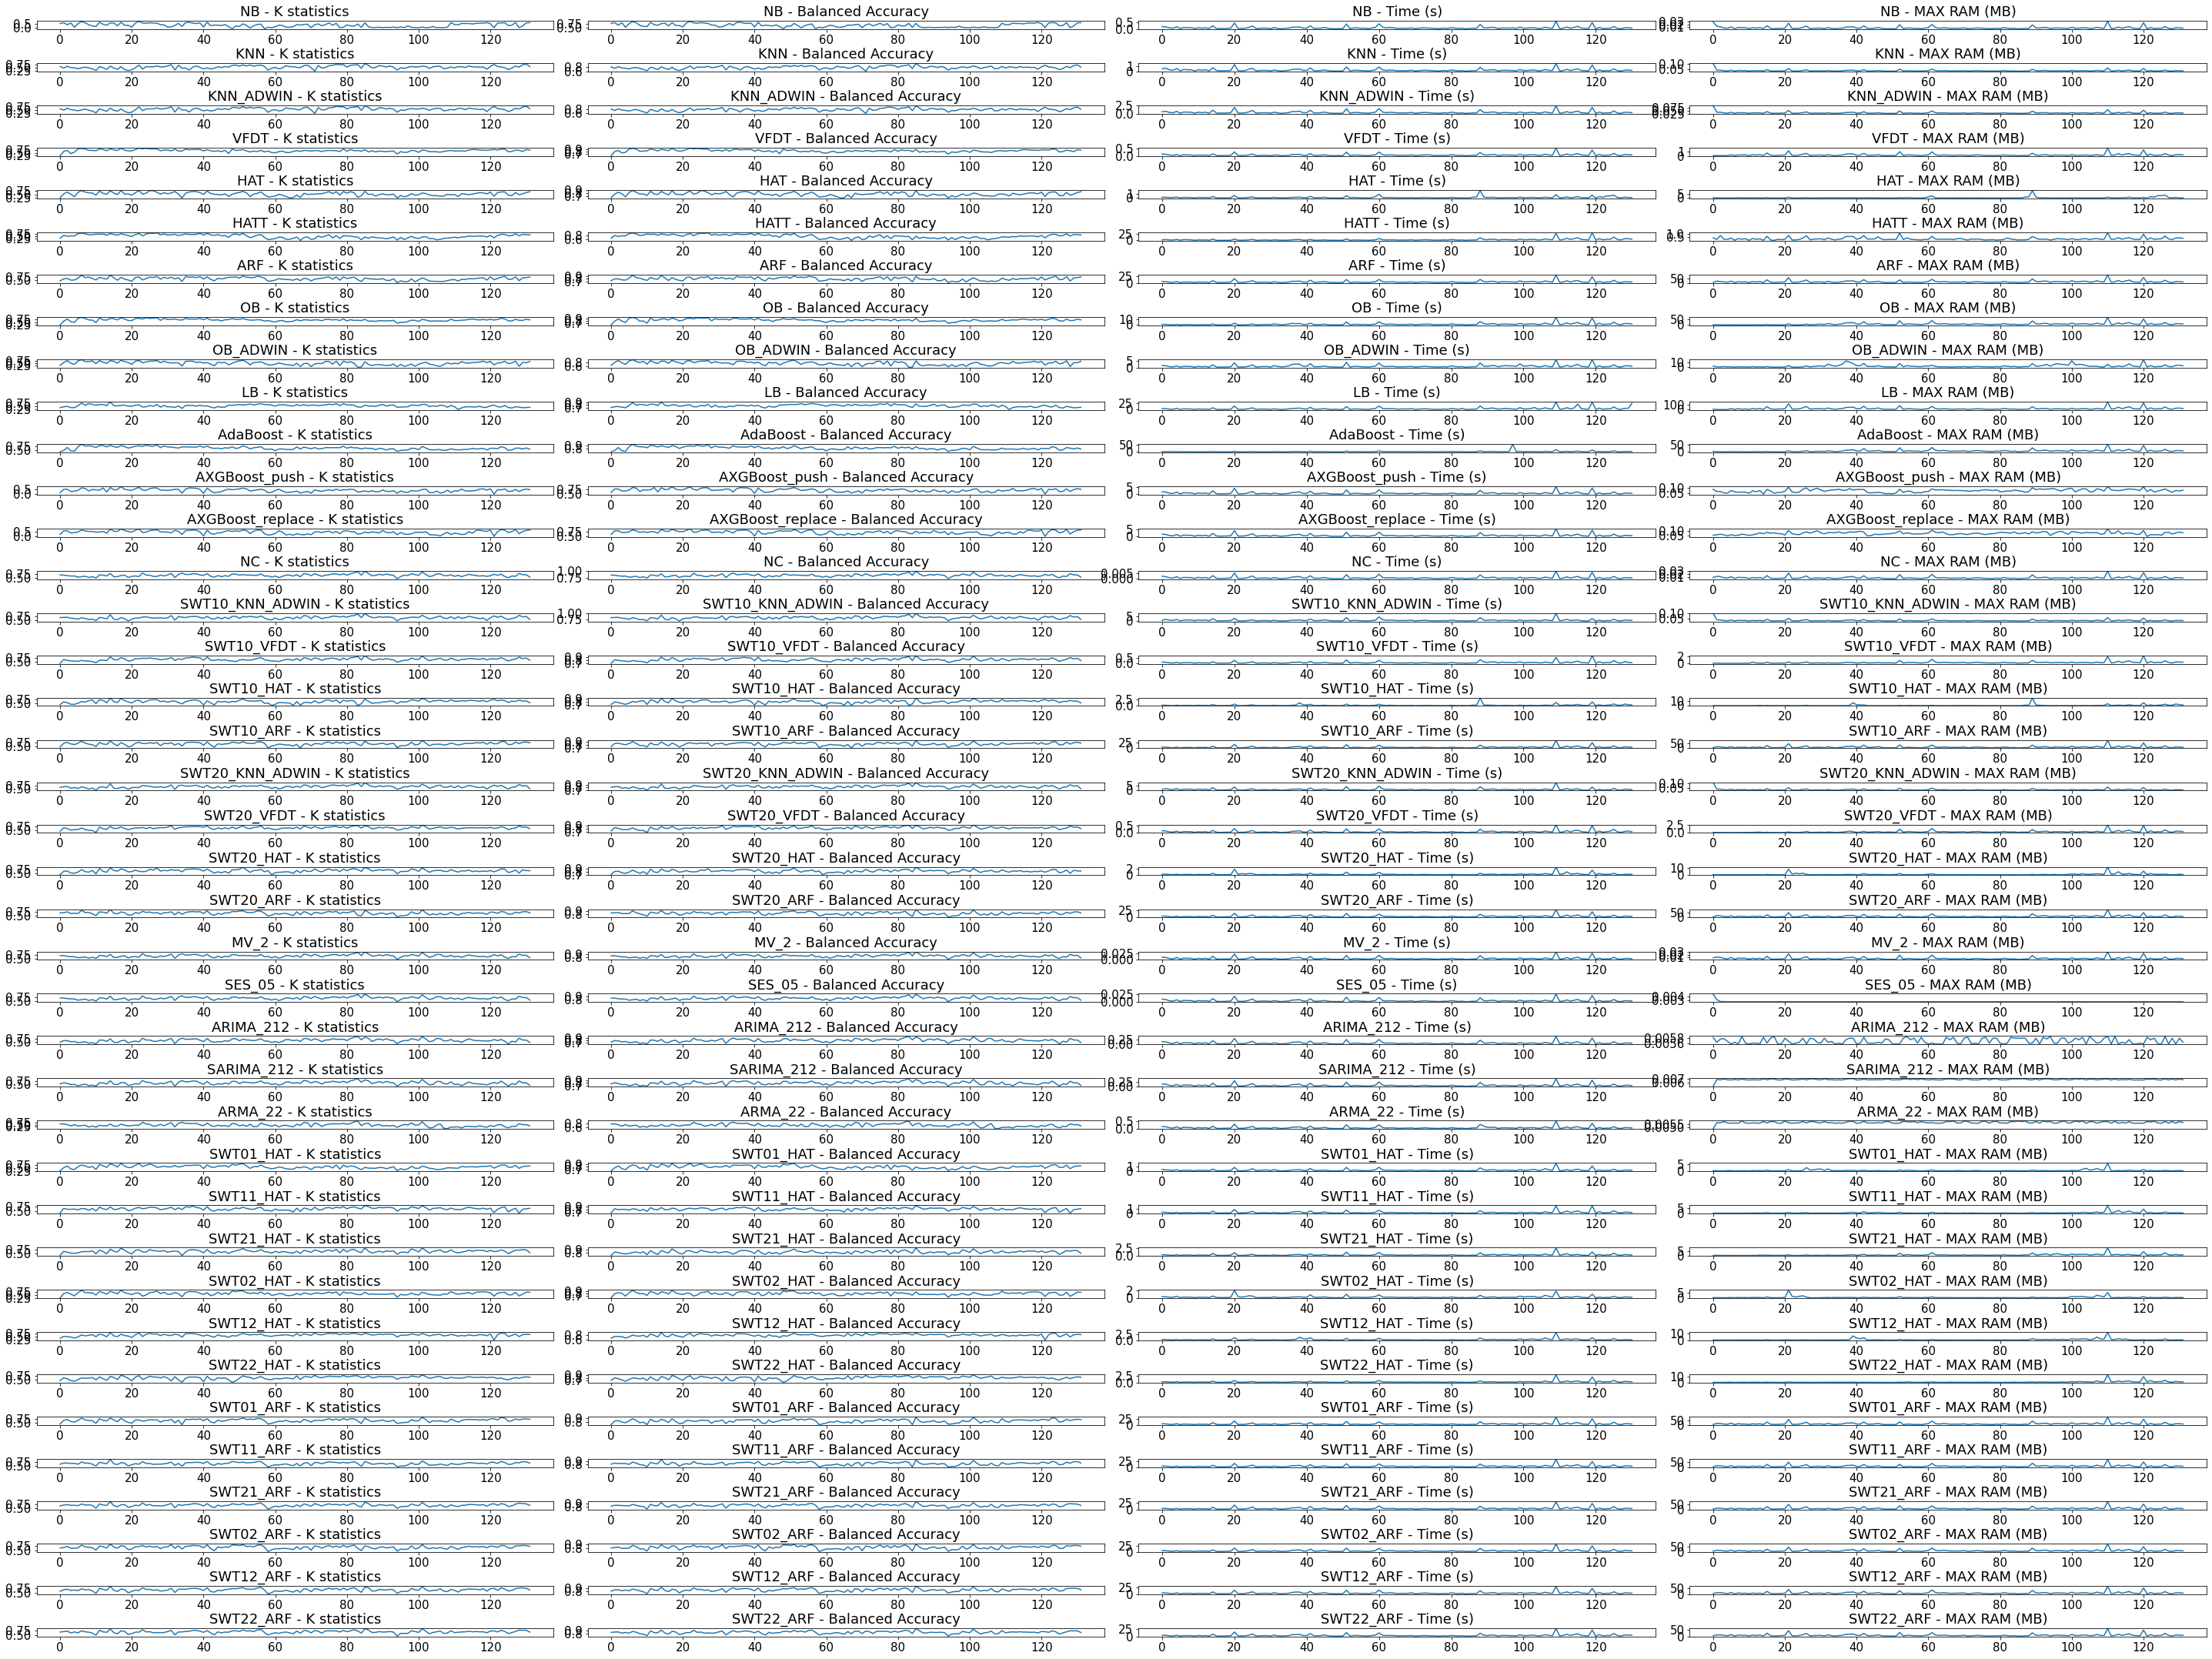

In [6]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(len(sml_landmark_k_results.keys()), 4, figsize=(40,30))
fig.tight_layout()
k = list(sml_landmark_k_results.keys())
x_axis = range(len(sml_landmark_k_results[k[0]]))
x_axis_time = range(len(sml_landmark_k_results[k[0]])-1)

for r in range(len(sml_landmark_k_results.keys())):
    axs[r,0].plot(x_axis, sml_landmark_k_results[k[r]],label=k[r])
    axs[r,0].set_title(k[r] + ' - K statistics', fontsize="large")
    axs[r,1].plot(x_axis, sml_landmark_acc_results[k[r]],label=k[r])
    axs[r,1].set_title(k[r] + ' - Balanced Accuracy', fontsize="large")
    axs[r,2].plot(x_axis_time, np.diff(sml_landmark_time_results[k[r]]),label=k[r])
    axs[r,2].set_title(k[r] + ' - Time (s)', fontsize="large")
    axs[r,3].plot(x_axis, sml_landmark_ram_results[k[r]],label=k[r])
    axs[r,3].set_title(k[r] + ' - MAX RAM (MB)', fontsize="large")

In [7]:
for key in k:
    mean_time = np.mean(sml_landmark_time_results[key])
    std_time = np.std(sml_landmark_time_results[key])
    mean_ram = np.mean(sml_landmark_ram_results[key])
    std_ram = np.std(sml_landmark_ram_results[key])
    print('** ' + key + ' **')
    print('AVG Time: ' + str(mean_time) + 's std: ' + str(std_time))
    print('AVG RAM: ' + str(mean_ram) + 'MB std: ' + str(std_ram))

** NB **
AVG Time: 6.327899477373809s std: 3.524140422800829
AVG RAM: 0.007873208595044636MB std: 0.004285285092796275
** KNN **
AVG Time: 17.717831604368005s std: 9.256348472909448
AVG RAM: 0.03256516456603998MB std: 0.007967654303905735
** KNN_ADWIN **
AVG Time: 26.330997581877387s std: 14.529575875462918
AVG RAM: 0.03246847932988941MB std: 0.007162433654385801
** VFDT **
AVG Time: 4.0684446395992016s std: 2.4134841821830393
AVG RAM: 0.23554412379409326MB std: 0.2575252082531834
** HAT **
AVG Time: 9.862657555322935s std: 6.058539240205388
AVG RAM: 0.41091626051700475MB std: 0.9251313759143401
** HATT **
AVG Time: 136.93576307448876s std: 101.61917139405107
AVG RAM: 0.29979856230995866MB std: 0.19361289841496274
** ARF **
AVG Time: 228.88526315163847s std: 143.23483590325625
AVG RAM: 12.695749600728355MB std: 11.233698334033985
** OB **
AVG Time: 75.92150288668077s std: 55.66873564800137
AVG RAM: 8.256099488518455MB std: 9.295566537934846
** OB_ADWIN **
AVG Time: 63.853539311929154s 

# Curve Comparison area filled

In [8]:
### colors to be used in the graphs ###
nc_color = 'gold'
tsa_color = 'palevioletred'
ml_color = 'coral'
sml_swt_color = 'slategrey'
sml_swt_predicted_color = 'lightsteelblue'
sml_color = 'darkslategrey'

## Box plot landmark Kappa

In [9]:
import seaborn as sns
from matplotlib.lines import Line2D
sns.set_theme(style="whitegrid")

In [11]:
#no-change
nc = pd.DataFrame.from_dict(sml_landmark_k_results)[['NC']]

#ml
ml = pd.DataFrame.from_dict(ml_frammented_landmark_k_results)
ml_meds = ml.mean()
ml_meds.sort_values(ascending=False, inplace=True)
ml = ml[ml_meds.index]

#tsa
tsa = pd.DataFrame.from_dict(sml_landmark_k_results)[['SES_05','ARIMA_212','SARIMA_212','ARMA_22']]
tsa_meds = tsa.mean()
tsa_meds.sort_values(ascending=False, inplace=True)
tsa = tsa[tsa_meds.index]

#sml
sml = pd.DataFrame.from_dict(sml_landmark_k_results)[['NB','KNN','KNN_ADWIN','VFDT','HAT','HATT','ARF','OB','OB_ADWIN','LB','AdaBoost','AXGBoost_push','AXGBoost_replace']]
sml_meds = sml.mean()
sml_meds.sort_values(ascending=False, inplace=True)
sml = sml[sml_meds.index]
sml = sml.rename(columns={"NB":"Online_NB", "KNN":"Online_KNN", "KNN_ADWIN":"Online_KNN_ADWIN", "AdaBoost":"Online_AdaBoost"})

#sml temporally augmented
sml_swt = pd.DataFrame.from_dict(sml_landmark_k_results)[['SWT10_KNN_ADWIN','SWT10_VFDT','SWT10_HAT','SWT10_ARF','SWT20_KNN_ADWIN','SWT20_VFDT','SWT20_HAT','SWT20_ARF']]
sml_swt_meds = sml_swt.mean()
sml_swt_meds.sort_values(ascending=False, inplace=True)
sml_swt = sml_swt[sml_swt_meds.index]

#sml predicted temporally augmented
sml_swt_predicted = pd.DataFrame.from_dict(sml_landmark_k_results)[['SWT01_HAT','SWT11_HAT','SWT21_HAT','SWT02_HAT','SWT12_HAT','SWT22_HAT','SWT01_ARF','SWT11_ARF','SWT21_ARF','SWT02_ARF','SWT12_ARF','SWT22_ARF']]
sml_swt_predicted_meds = sml_swt_predicted.mean()
sml_swt_predicted_meds.sort_values(ascending=False, inplace=True)
sml_swt_predicted = sml_swt_predicted[sml_swt_predicted_meds.index]


nc = nc.join(ml)
nc = nc.join(tsa)
nc = nc.join(sml)
nc = nc.join(sml_swt)
nc = nc.join(sml_swt_predicted)


In [12]:
palette = {}
palette['NC'] = nc_color
for b_l in ml.columns:
    palette[b_l] = ml_color
for b_l in tsa.columns:
    palette[b_l] = tsa_color
for b_l in sml.columns:
    palette[b_l] = sml_color
for b_l in sml_swt.columns:
    palette[b_l] = sml_swt_color
for b_l in sml_swt_predicted.columns:
    palette[b_l] = sml_swt_predicted_color

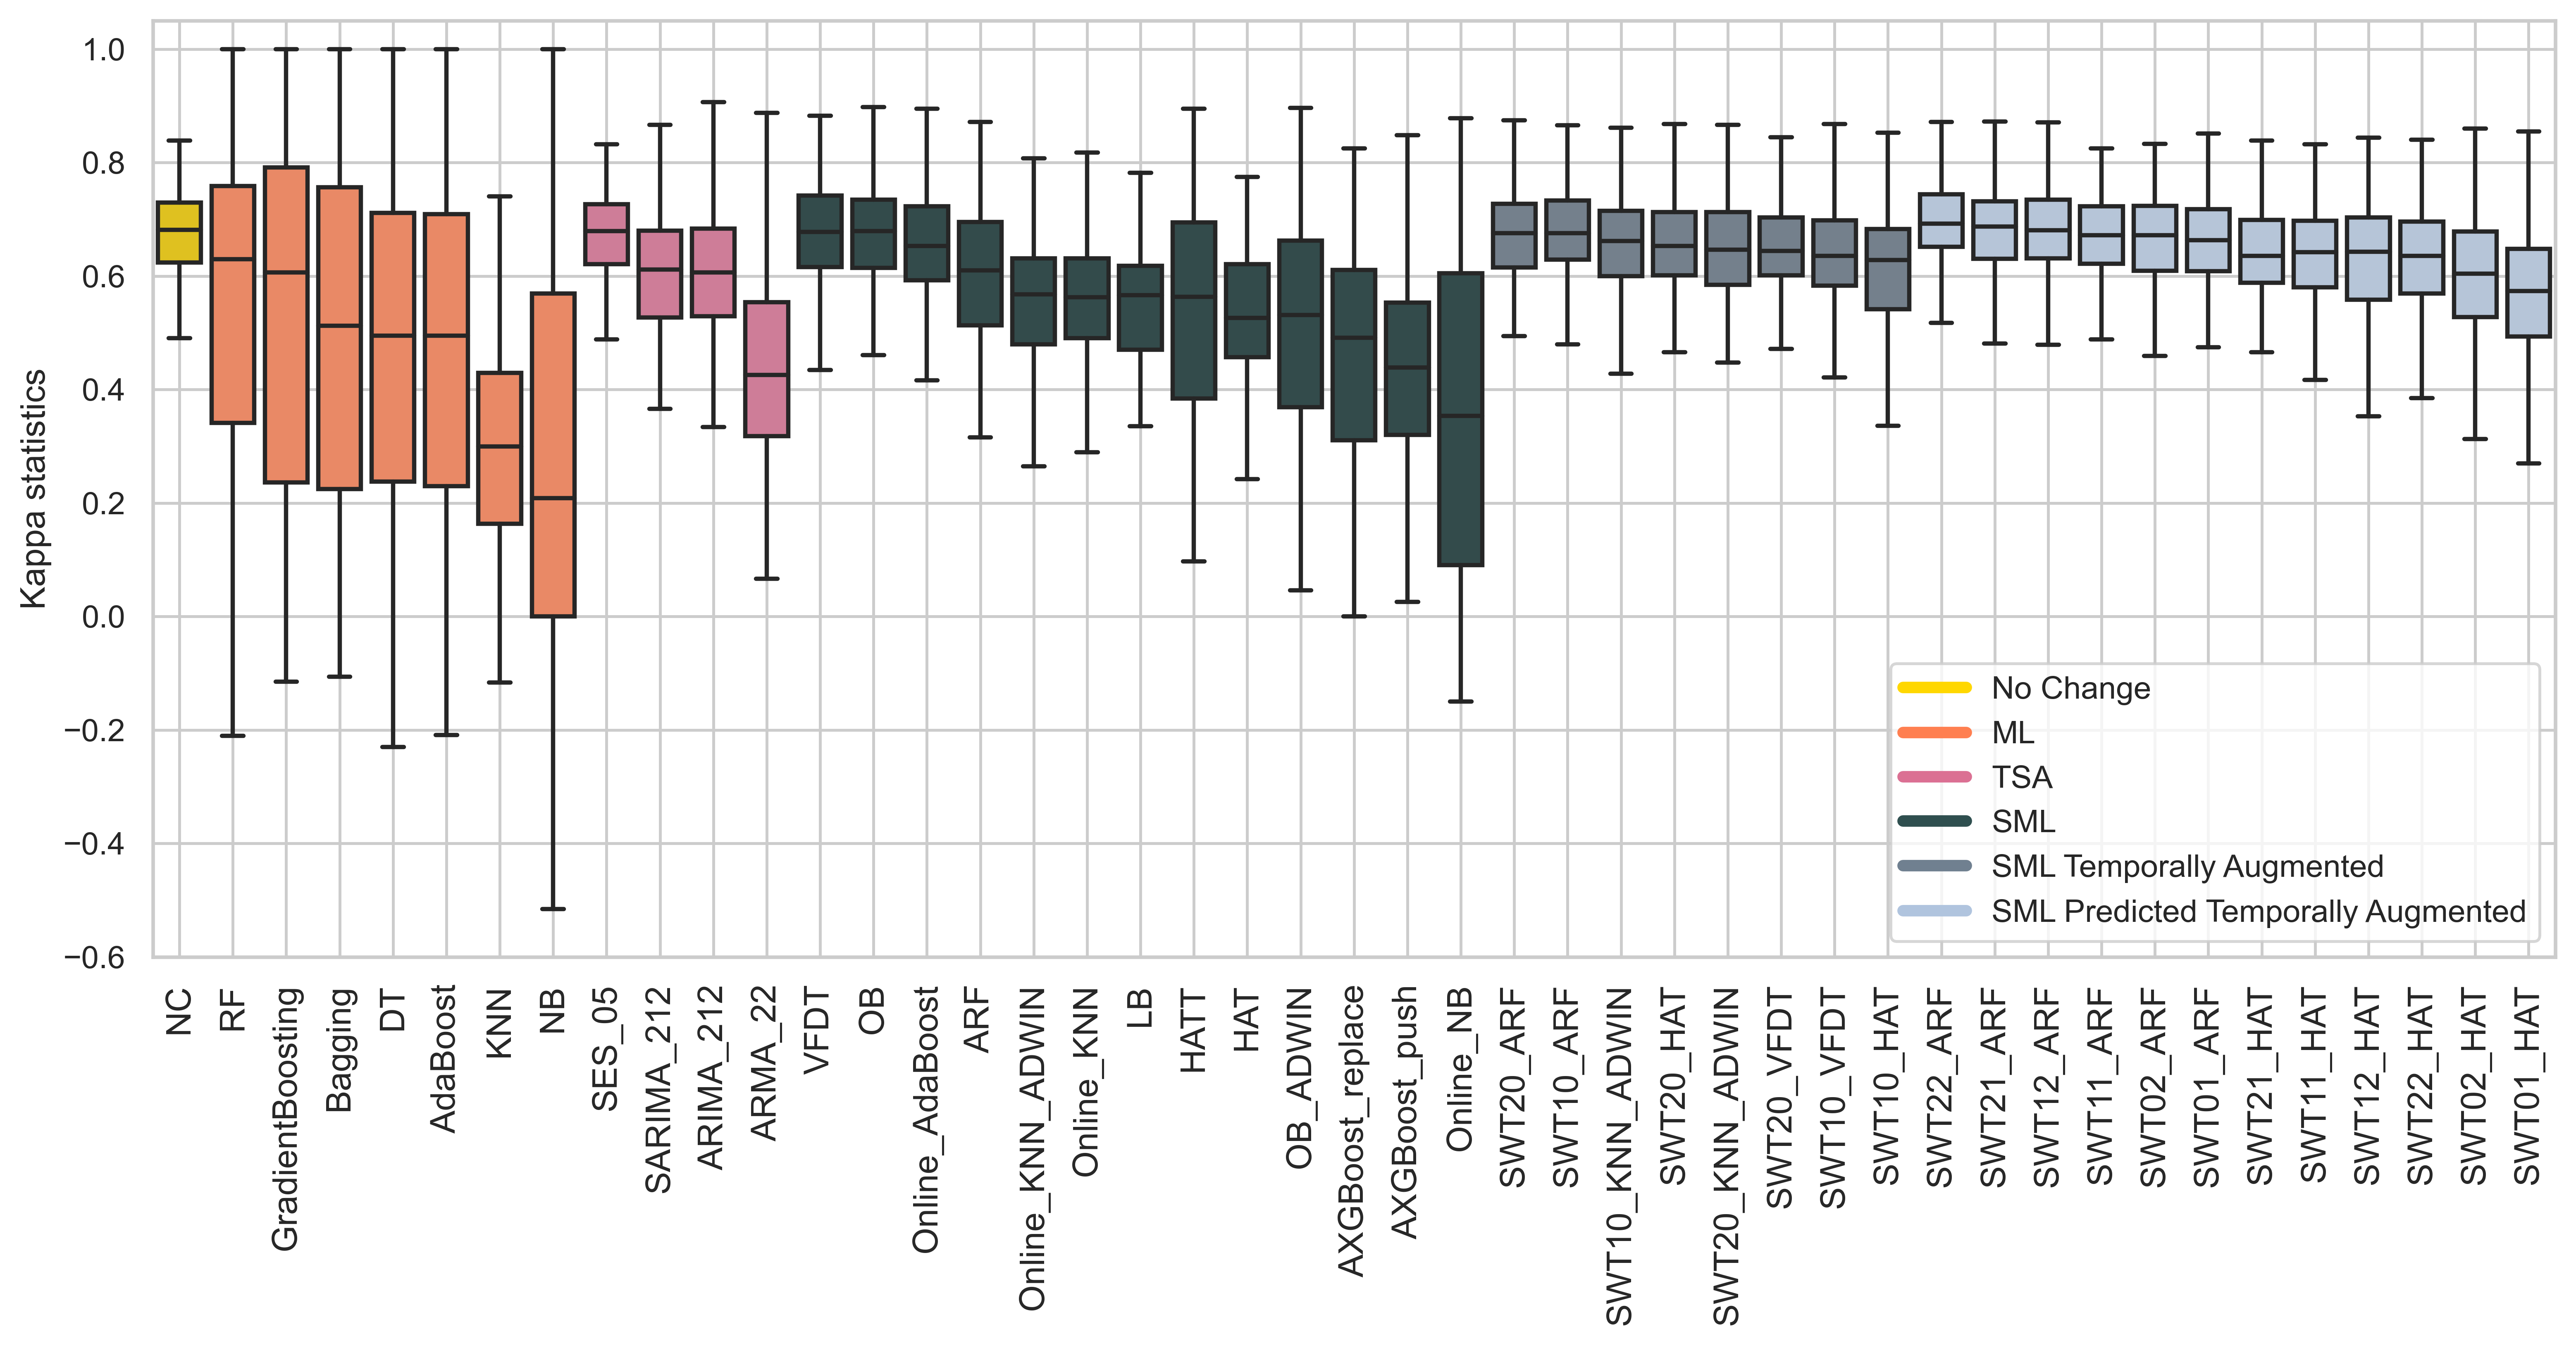

In [14]:
fig, ax = plt.subplots(figsize=(15,6), dpi=500)
sns.boxplot(ax=ax, data=nc, showfliers=False, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=12)
ax.grid(True)
ax.set_ylabel('Kappa statistics')
legend_elements = [
    Line2D([0], [0], color=nc_color, lw=4, label='No Change'),
    Line2D([0], [0], color=ml_color, lw=4, label='ML'),
    Line2D([0], [0], color=tsa_color, lw=4, label='TSA'),
    Line2D([0], [0], color=sml_color, lw=4, label='SML'),
    Line2D([0], [0], color=sml_swt_color, lw=4, label='SML Temporally Augmented'),
    Line2D([0], [0], color=sml_swt_predicted_color, lw=4, label='SML Predicted Temporally Augmented'),    
]
ax.set_ylim((-0.6, 1.05))
ax.legend(handles=legend_elements, loc='best')
#plt.show()
#plt.savefig("results/elec/boxplot_k.png", bbox_inches='tight')

## K-stat

In [ ]:
y1 = np.array(sml_landmark_k_results['NC'])
y2 = np.array(sml_landmark_k_results['SES_05'])
y3 = np.array(sml_landmark_k_results['ARMA_22'])
y4 = np.array(ml_frammented_landmark_k_results['RF'])
y5 = np.nan_to_num(np.array(ml_frammented_landmark_k_results['NB']))
y6 = np.array(sml_landmark_k_results['SWT20_ARF'])
y7 = np.array(sml_landmark_k_results['SWT10_HAT'])
y8 = np.array(sml_landmark_k_results['VFDT'])
y9 = np.array(sml_landmark_k_results['NB'])
y10 = np.array(sml_landmark_k_results['SWT22_ARF'])
y11 = np.array(sml_landmark_k_results['SWT01_HAT'])

fig, axs = plt.subplots(5, 2, figsize=(20,10),dpi=500,sharex=True,sharey=True)

## NO-CHANGE VS TSA MODELS ##
axs[0,0].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[0,0].plot(range(len(sml_landmark_k_results['NC'])),y2, label='SES_05', color=tsa_color)
axs[0,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y2,
                 where=(y1 > y2), color=nc_color, alpha=0.3, interpolate=True)
axs[0,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y2,
                 where=(y2 > y1), color=tsa_color, alpha=0.3, interpolate=True)
axs[0,0].legend(loc='best',fontsize=15)
axs[0,0].set_ylabel('Kappa statistics', fontsize=15)
axs[0,0].set_title('No Change vs best TSA', size=15)
axs[0,0].set_ylim((-0.1, 1))

axs[0,1].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[0,1].plot(range(len(sml_landmark_k_results['NC'])),y3, label='ARMA_22', color=tsa_color)
axs[0,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y3,
                 where=(y1 > y3), color=nc_color, alpha=0.3, interpolate=True)
axs[0,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y3,
                 where=(y3 > y1), color=tsa_color, alpha=0.3, interpolate=True)
axs[0,1].legend(loc='best',fontsize=15)
axs[0,1].set_title('No Change vs worst TSA', size=15)


## NO-CHANGE VS ML MODELS ##
axs[1,0].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[1,0].plot(range(len(sml_landmark_k_results['NC'])),y4, label='RF', color=ml_color)
axs[1,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y4,
                 where=(y1 > y4), color=nc_color, alpha=0.3, interpolate=True)
axs[1,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y4,
                 where=(y4 > y1), color=ml_color, alpha=0.75, interpolate=True)
axs[1,0].legend(loc='best',fontsize=15)
axs[1,0].set_title('No Change vs best ML', size=15)
axs[1,0].set_ylabel('Kappa statistics', fontsize=15)

axs[1,1].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[1,1].plot(range(len(sml_landmark_k_results['NC'])),y5, label='NB', color=ml_color)
axs[1,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y5,
                 where=(y1 > y5), color=nc_color, alpha=0.3, interpolate=True)
axs[1,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y5,
                 where=(y5 > y1), color=ml_color, alpha=0.75, interpolate=True)
axs[1,1].legend(loc='best',fontsize=15)
axs[1,1].set_title('No Change vs worst ML', size=15)

## NO-CHANGE VS SML MODELS ##
axs[2,0].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[2,0].plot(range(len(sml_landmark_k_results['NC'])),y8, label='VFDT', color=sml_color)
axs[2,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y8,
                 where=(y1 > y8), color=nc_color, alpha=0.3, interpolate=True)
axs[2,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y8,
                where=(y8 > y1), color=sml_color, alpha=0.3, interpolate=True)
axs[2,0].legend(loc='best',fontsize=15)
axs[2,0].set_title('No Change vs best SML', size=15)
axs[2,0].set_ylabel('Kappa statistics', fontsize=15)

axs[2,1].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[2,1].plot(range(len(sml_landmark_k_results['NC'])),y9, label='Online NB', color=sml_color)
axs[2,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y9,
                 where=(y1 > y9), color=nc_color, alpha=0.3, interpolate=True)
axs[2,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y9,
                 where=(y9 > y1), color=sml_color, alpha=0.3, interpolate=True)
axs[2,1].legend(loc='best',fontsize=15)
axs[2,1].set_title('No Change vs worst SML', size=15)

## NO-CHANGE VS SML MODELS TEMPORALLY AUGMENTED ##
axs[3,0].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[3,0].plot(range(len(sml_landmark_k_results['NC'])),y6, label='SWT20_ARF', color=sml_swt_color)
axs[3,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y6,
                 where=(y1 > y6), color=nc_color, alpha=0.3, interpolate=True)
axs[3,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y6,
                 where=(y6 > y1), color=sml_swt_color, alpha=0.3, interpolate=True)
axs[3,0].legend(loc='best',fontsize=15)
axs[3,0].set_title('No Change vs best SML Temporally Augmented', size=15)
axs[3,0].set_ylabel('Kappa statistics', fontsize=15)

axs[3,1].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[3,1].plot(range(len(sml_landmark_k_results['NC'])),y7, label='SWT10_HAT', color=sml_swt_color)
axs[3,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y7,
                 where=(y1 > y7), color=nc_color, alpha=0.3, interpolate=True)
axs[3,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y7,
                 where=(y7 > y1), color=sml_swt_color, alpha=0.3, interpolate=True)
axs[3,1].legend(loc='best',fontsize=15)
axs[3,1].set_title('No Change vs worst SML Temporally Augmented', size=15)

## NO-CHANGE VS SML MODELS Predicted TEMPORALLY AUGMENTED ##
axs[4,0].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[4,0].plot(range(len(sml_landmark_k_results['NC'])),y10, label='SWT22_ARF', color=sml_swt_predicted_color)
axs[4,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y10,
                 where=(y1 > y10), color=nc_color, alpha=0.3, interpolate=True)
axs[4,0].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y10,
                 where=(y10 > y1), color=sml_swt_predicted_color, alpha=0.3, interpolate=True)
axs[4,0].legend(loc='best',fontsize=15)
axs[4,0].set_title('No Change vs best SML Predicted Temporally Augmented', size=15)
axs[4,0].set_ylabel('Kappa statistics', fontsize=15)

axs[4,1].plot(range(len(sml_landmark_k_results['NC'])),y1, label='NC', color=nc_color)
axs[4,1].plot(range(len(sml_landmark_k_results['NC'])),y11, label='SWT01_HAT', color=sml_swt_predicted_color)
axs[4,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y11,
                 where=(y1 > y11), color=nc_color, alpha=0.3, interpolate=True)
axs[4,1].fill_between(range(len(sml_landmark_k_results['NC'])),y1, y11,
                 where=(y11 > y1), color=sml_swt_predicted_color, alpha=0.3, interpolate=True)
axs[4,1].legend(loc='best',fontsize=15)
axs[4,1].set_title('No Change vs worst SML Predicted Temporally Augmented', size=15)



plt.tight_layout()
#plt.show()

plt.savefig("results/elec/area_chart_k.png", bbox_inches='tight')

## Time

In [ ]:
y_vfdt = np.array(np.diff(sml_landmark_time_results['VFDT']))
y_nc = np.array(np.diff(sml_landmark_time_results['NC']))
y_ses = np.array(np.diff(sml_landmark_time_results['SES_05']))
y_arma = np.array(np.diff(sml_landmark_time_results['ARMA_22']))
y_rf = np.array(ml_frammented_landmark_time_results['RF'])[:-1]
y_nb = np.array(ml_frammented_landmark_time_results['NB'])[:-1]
y_swt22_arf = np.array(np.diff(sml_landmark_time_results['SWT22_ARF']))
y_swt01_hat = np.array(np.diff(sml_landmark_time_results['SWT01_HAT']))
y_swt20_arf = np.array(np.diff(sml_landmark_time_results['SWT20_ARF']))
y_swt10_hat = np.array(np.diff(sml_landmark_time_results['SWT10_HAT']))
y_onb = np.array(np.diff(sml_landmark_time_results['NB']))


x_asis = range(len(sml_landmark_k_results['SWT20_ARF'])-1)

fig, axs = plt.subplots(5, 2, figsize=(15,10),dpi=500,sharex=True,sharey=True)


#provare log_time o togliere SWT o scala y max 5

## VFDT VS TSA MODELS ##
axs[0,0].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[0,0].plot(x_asis,y_ses, label='SES_05', color=tsa_color)
#axs[0,0].fill_between(x_asis,y_vfdt, y_ses, where=(y_vfdt > y_ses), color=sml_color, alpha=0.3, interpolate=True)
#axs[0,0].fill_between(x_asis,y_vfdt, y_ses, where=(y_ses > y_vfdt), color=tsa_color, alpha=0.3, interpolate=True)
axs[0,0].legend(loc='best',fontsize=15)
axs[0,0].set_ylabel('Time (s)', fontsize=18)
axs[0,0].set_title('SML vs best TSA', size=19)
axs[0,0].set_ylim((0.0001, 20))
axs[0,0].set_yscale('log')
axs[0,0].tick_params(axis='both', which='major', labelsize=13)


axs[0,1].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[0,1].plot(x_asis,y_arma, label='ARMA_22', color=tsa_color)
#axs[0,1].fill_between(x_asis,y_vfdt, y_arma,where=(y_vfdt > y_arma), color=sml_color, alpha=0.3, interpolate=True)
#axs[0,1].fill_between(x_asis,y_vfdt, y_arma,where=(y_arma > y_vfdt), color=tsa_color, alpha=0.3, interpolate=True)
axs[0,1].legend(loc='best',fontsize=15)
axs[0,1].set_title('SML vs worst TSA', size=19)

## VFDT VS ML MODELS ##
axs[1,0].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[1,0].plot(x_asis,y_rf, label='RF', color=ml_color)
#axs[1,0].fill_between(x_asis,y_vfdt,y_rf,where=(y_vfdt > y_rf), color=sml_color, alpha=0.3, interpolate=True)
#axs[1,0].fill_between(x_asis,y_vfdt,y_rf,where=(y_rf > y_vfdt), color=ml_color, alpha=0.75, interpolate=True)
axs[1,0].legend(loc='best',fontsize=15)
axs[1,0].set_ylabel('Time (s)', fontsize=18)
axs[1,0].set_title('SML vs best ML', size=19)
axs[1,0].tick_params(axis='both', which='major', labelsize=13)

axs[1,1].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[1,1].plot(x_asis,y_nb, label='NB', color=ml_color)
#axs[1,1].fill_between(x_asis,y_vfdt, y_nb,where=(y_vfdt > y_nb), color=sml_color, alpha=0.3, interpolate=True)
#axs[1,1].fill_between(x_asis,y_vfdt, y_nb,where=(y_nb > y_vfdt), color=ml_color, alpha=0.75, interpolate=True)
axs[1,1].legend(loc='best',fontsize=15)
axs[1,1].set_title('SML vs worst ML', size=19)

## VFDT VS SML MODEL ##
axs[2,0].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[2,0].plot(x_asis,y_nc, label='NC', color=nc_color)
#axs[2,0].fill_between(x_asis,y_vfdt, y_nc,where=(y_vfdt > y_nc), color=sml_color, alpha=0.3, interpolate=True)
#axs[2,0].fill_between(x_asis,y_vfdt, y_nc,where=(y_nc > y_vfdt), color=nc_color, alpha=0.3, interpolate=True)
axs[2,0].legend(loc='best',fontsize=15)
axs[2,0].set_ylabel('Time (s)', fontsize=18)
axs[2,0].set_title('SML vs No Change', size=19)
axs[2,0].tick_params(axis='both', which='major', labelsize=13)

axs[2,1].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[2,1].plot(x_asis,y_nb, label='Online NB', color=nc_color)
#axs[2,1].fill_between(x_asis,y_vfdt, y_nb, where=(y_vfdt > y_nb), color=sml_color, alpha=0.3, interpolate=True)
#axs[2,1].fill_between(x_asis,y_vfdt, y_nb, where=(y_nb > y_vfdt), color=sml_color, alpha=0.3, interpolate=True)
axs[2,1].legend(loc='best',fontsize=15)
axs[2,1].set_title('SML vs worst SML', size=19)

## VFDT VS SWT SML Temporally Augmented ##
axs[3,0].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[3,0].plot(x_asis,y_swt20_arf, label='SWT20_ARF', color=sml_swt_color)
#axs[3,0].fill_between(x_asis,y_vfdt, y_swt20_arf,where=(y_vfdt > y_swt20_arf), color=sml_color, alpha=0.3, interpolate=True)
#axs[3,0].fill_between(x_asis,y_vfdt, y_swt20_arf,where=(y_swt20_arf > y_vfdt), color=sml_swt_color, alpha=0.3, interpolate=True)
axs[3,0].legend(loc='best',fontsize=15)
axs[3,0].set_ylabel('Time (s)', fontsize=18)
axs[3,0].set_title('SML vs best SML Temporally Augmented', size=19)
axs[3,0].tick_params(axis='both', which='major', labelsize=13)

axs[3,1].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[3,1].plot(x_asis,y_swt10_hat, label='SWT10_HAT', color=sml_swt_color)
#axs[3,1].fill_between(x_asis,y_vfdt, y_swt10_hat,where=(y_vfdt > y_swt10_hat), color=sml_color, alpha=0.3, interpolate=True)
#axs[3,1].fill_between(x_asis,y_vfdt, y_swt10_hat,where=(y_swt10_hat > y_vfdt), color=sml_swt_color, alpha=0.3, interpolate=True)
axs[3,1].legend(loc='best',fontsize=15)
axs[3,1].set_title('SML vs worst SML Temporally Augmented', size=19)

## VFDT VS SWT SML Temporally Augmented ##
axs[4,0].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[4,0].plot(x_asis,y_swt22_arf, label='SWT22_ARF', color=sml_swt_predicted_color)
#axs[4,0].fill_between(x_asis,y_vfdt, y_swt22_arf,where=(y_vfdt > y_swt22_arf), color=sml_color, alpha=0.3, interpolate=True)
#axs[4,0].fill_between(x_asis,y_vfdt, y_swt22_arf,where=(y_swt22_arf > y_vfdt), color=sml_swt_predicted_color, alpha=0.3, interpolate=True)
axs[4,0].legend(loc='best',fontsize=15)
axs[4,0].set_ylabel('Time (s)', fontsize=18)
axs[4,0].set_title('SML vs best SML Predicted Temporally Augmented', size=19)
axs[4,0].tick_params(axis='both', which='major', labelsize=13)

axs[4,1].plot(x_asis,y_vfdt, label='VFDT', color=sml_color)
axs[4,1].plot(x_asis,y_swt01_hat, label='SWT01_HAT', color=sml_swt_predicted_color)
#axs[4,1].fill_between(x_asis,y_vfdt, y_swt01_hat,where=(y_vfdt > y_swt01_hat), color=sml_color, alpha=0.3, interpolate=True)
#axs[4,1].fill_between(x_asis,y_vfdt, y_swt01_hat,where=(y_swt01_hat > y_vfdt), color=sml_swt_predicted_color, alpha=0.3, interpolate=True)
axs[4,1].legend(loc='best',fontsize=15)
axs[4,1].set_title('SML vs worst SML Predicted Temporally Augmented', size=19)
axs[4,1].tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
#plt.show()
plt.savefig("results/elec/area_chart_time.png", bbox_inches='tight')


## Box plot landmark Balanced Acc

In [ ]:
#no-change
nc = pd.DataFrame.from_dict(sml_landmark_acc_results)[['NC']]

#ml
ml = pd.DataFrame.from_dict(ml_frammented_landmark_acc_results)
ml_meds = ml.mean()
ml_meds.sort_values(ascending=False, inplace=True)
ml = ml[ml_meds.index]

#tsa
tsa = pd.DataFrame.from_dict(sml_landmark_acc_results)[['SES_05','ARIMA_212','SARIMA_212','ARMA_22']]
tsa_meds = tsa.mean()
tsa_meds.sort_values(ascending=False, inplace=True)
tsa = tsa[tsa_meds.index]

#sml
sml = pd.DataFrame.from_dict(sml_landmark_acc_results).drop(['SES_05','ARIMA_212','SARIMA_212','NC','ARMA_22','MV_2'],axis=1)
sml_meds = sml.mean()
sml_meds.sort_values(ascending=False, inplace=True)
sml = sml[sml_meds.index]
sml = sml.rename(columns={"NB":"Online_NB", "KNN":"Online_KNN", "KNN_ADWIN":"Online_KNN_ADWIN", "AdaBoost":"Online_AdaBoost"})

nc = nc.join(ml)
nc = nc.join(tsa)
nc = nc.join(sml)

In [ ]:
palette = {}
palette['NC'] = nc_color
for b_l in ml.columns:
    palette[b_l] = ml_color
for b_l in tsa.columns:
    palette[b_l] = tsa_color
for b_l in sml.columns:
    if 'SWT' in b_l:
        palette[b_l] = sml_swt_color
    else:
        palette[b_l] = sml_color

In [ ]:
fig, ax = plt.subplots(figsize=(15,8), dpi=800)
sns.boxplot(ax=ax, data=nc, showfliers=False, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=12)
ax.grid(True)
ax.set_ylabel('Balanced Accuracy')
legend_elements = [Line2D([0], [0], color=nc_color, lw=4, label='No Change'),
Line2D([0], [0], color=ml_color, lw=4, label='ML'),
Line2D([0], [0], color=tsa_color, lw=4, label='TSA'),
                  Line2D([0], [0], color=sml_swt_color, lw=4, label='SML Temporally Augmented'),
                  Line2D([0], [0], color=sml_color, lw=4, label='SML')]
ax.legend(handles=legend_elements, loc='best')
plt.show()

## Box plot landmark TIME

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(2, 1, figsize=(40,30))

#ml_frammented_landmark_time_results.pop('NC', None)

t = pd.DataFrame.from_dict(ml_frammented_landmark_time_results)
boxplot = t.boxplot(column=list(ml_frammented_landmark_time_results.keys()),rot=45, figsize=(20,10), ax=axs[0])
t = pd.DataFrame.from_dict(sml_landmark_time_results)
boxplot = t.boxplot(column=list(sml_landmark_time_results.keys()),rot=45, figsize=(20,10), ax=axs[1])


## Box plot landmark RAM

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(2, 1, figsize=(40,30))

#ml_frammented_landmark_ram_results.pop('NC', None)

t = pd.DataFrame.from_dict(ml_frammented_landmark_ram_results)
boxplot = t.boxplot(column=list(ml_frammented_landmark_ram_results.keys()),rot=45, figsize=(20,10), ax=axs[0])
t = pd.DataFrame.from_dict(sml_landmark_ram_results)
boxplot = t.boxplot(column=list(sml_landmark_ram_results.keys()),rot=45, figsize=(20,10), ax=axs[1])


# DF Plot

In [ ]:
df_plot = pd.read_csv('dataset/Elec.csv')[['class']]

In [ ]:
segments.pop(0)
segments.pop(len(segments)-1)

In [ ]:
segments_plot = [x for x in segments if x<10000]

In [ ]:
plt.rcParams["figure.figsize"] = (80,10)
plt.plot(range(len(df_plot['class'].to_list()[:10000])), df_plot['class'].to_list()[:10000])
for x in segments_plot:
    plt.axvline(x=x, color='black', linestyle='--', lw=8)
plt.axis('off')
plt.savefig("results/label_distr.png", bbox_inches='tight')

In [ ]:
plt.rcParams["figure.figsize"] = (80,10)
plt.plot(range(len(df_plot['class'].to_list()[:10000])), df_plot['class'].to_list()[:10000])
plt.axis('off')
plt.savefig("results/label_distr_no_drift.png", bbox_inches='tight')
